# FINAL REPORT - Introduction to Buisness Analytics

Group:
Ashish Rakesh Chandra Kukreti (s230134), Ashutosh Dhaka (s222374), Daniel Lihotský (s231868), Natsuki Sato (s231459) and Oskar Fusager (s204383)

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv('Trips_2018.csv')

In [18]:
df.head(10)

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1
5,5,1602,2018-01-01 21:31:54.1920,2018-01-01 21:58:36.3530,72.0,40.767272,-73.993929,482.0,40.739355,-73.999318,30106,Subscriber,1968,1
6,6,722,2018-01-02 07:54:53.6460,2018-01-02 08:06:55.8720,72.0,40.767272,-73.993929,228.0,40.754601,-73.971879,32059,Subscriber,1978,1
7,7,434,2018-01-02 08:06:14.3310,2018-01-02 08:13:28.7670,72.0,40.767272,-73.993929,173.0,40.760683,-73.984527,30525,Subscriber,1983,1
8,8,366,2018-01-02 08:10:15.2550,2018-01-02 08:16:21.8960,72.0,40.767272,-73.993929,479.0,40.760193,-73.991255,27439,Subscriber,1974,1
9,9,324,2018-01-02 08:13:30.8960,2018-01-02 08:18:55.1200,72.0,40.767272,-73.993929,450.0,40.762272,-73.987882,30892,Subscriber,1947,1


# Section 1 - Introduction + Data analysis and visualization + Cleaning:



Introduction:
For data analysis and visualization purposes, We have first gathered data on Trip Duration, Visualization of the station IDs, Gender, Birth, User Type, and Datetime.
In the data cleaning phase, we focused on refining the Citi Bike dataset for accurate analysis. This involved addressing missing values, managing outliers, ensuring consistency in data formats, and removing irrelevant information. These steps are crucial for reliable and meaningful insights from the data.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17548339 entries, 0 to 17548338
Data columns (total 14 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Unnamed: 0               int64  
 1   tripduration             int64  
 2   starttime                object 
 3   stoptime                 object 
 4   start_station_id         float64
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_latitude     float64
 9   end_station_longitude    float64
 10  bikeid                   int64  
 11  usertype                 object 
 12  birth_year               int64  
 13  gender                   int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 1.8+ GB


Start time and dat are : str


In [20]:
type(df['starttime'].values[0])

str

In [21]:
df.shape

(17548339, 14)

# Trip Duration

In this analysis, we will focus on the `tripduration` attribute, converting it from seconds to minutes to facilitate a more intuitive understanding. We'll visualize the distribution of trip durations using a histogram, which will allow us to see the frequency of various trip lengths.

Key statistical metrics such as the maximum, minimum, and average durations of trips will be calculated and displayed. This will provide a clear overview of the range and typical duration of trips.

We will also categorize and analyze the trips based on their duration. Specifically, we'll look at the number of trips that fall into the following duration categories:
- Less than 30 minutes
- Less than 60 minutes (1 hour)
- Less than 24 hours (1,440 minutes)
- Less than 7 days (10,080 minutes)
- More than 30 days (43,200 minutes)

For each category, we will calculate and display the number of trips. This categorization will help us understand the distribution of trip lengths and identify the most common trip durations.

Finally, we'll create a scatter plot of trip durations. This plot will visually represent individual trip lengths, offering insights into the variability and spread of the data.

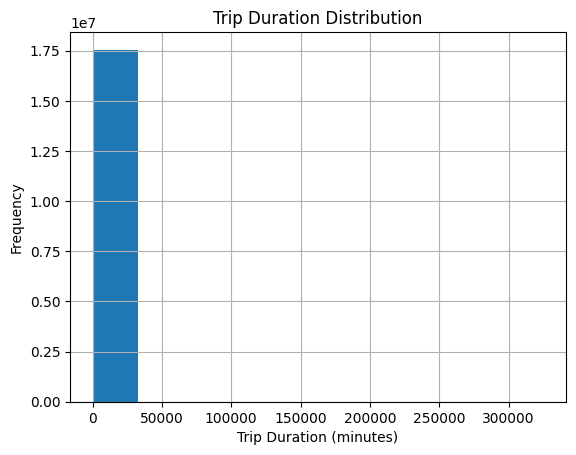

Maximum rented duration: 225.81 days or 325167.48 mins
Minimum rented duration: 1.02 mins
Average trip duration: 16.48 mins


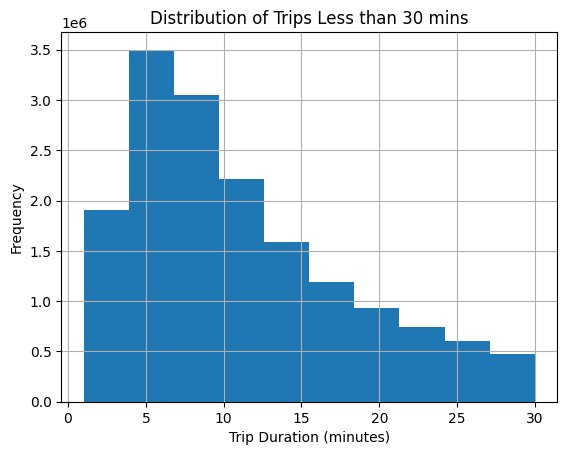

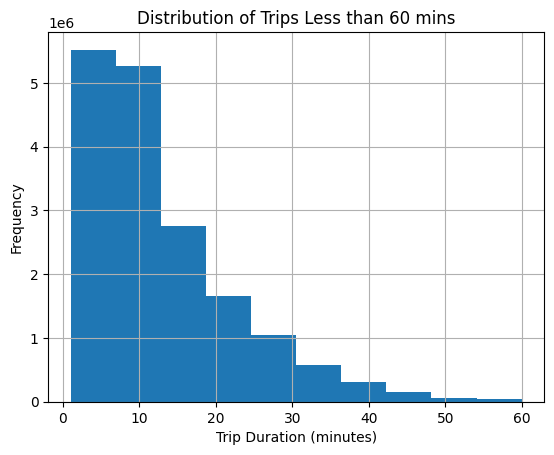

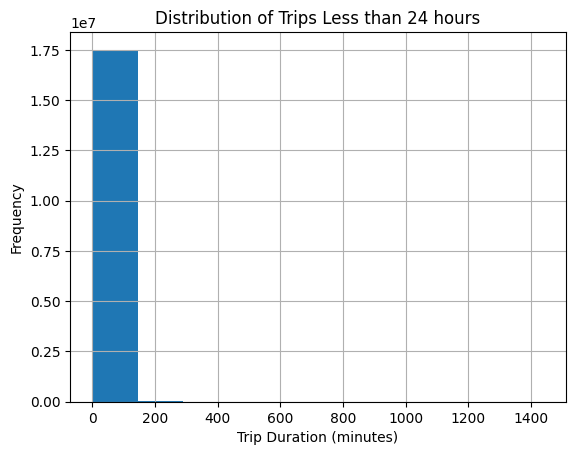

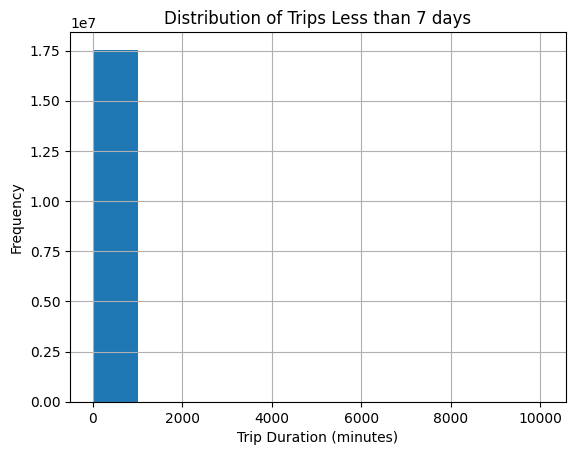

Trip duration after one day: 3564 mins


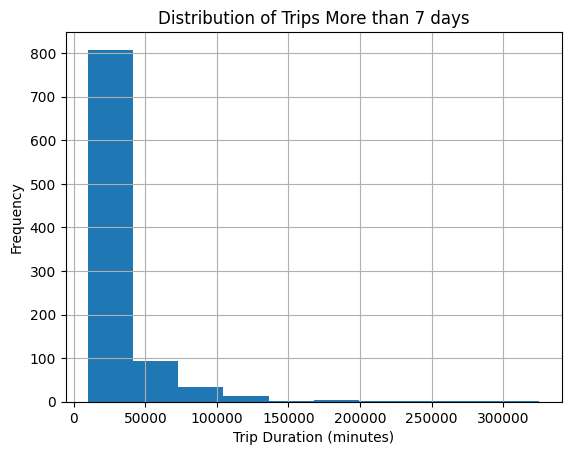

Trip duration more than 7 days: 822 mins


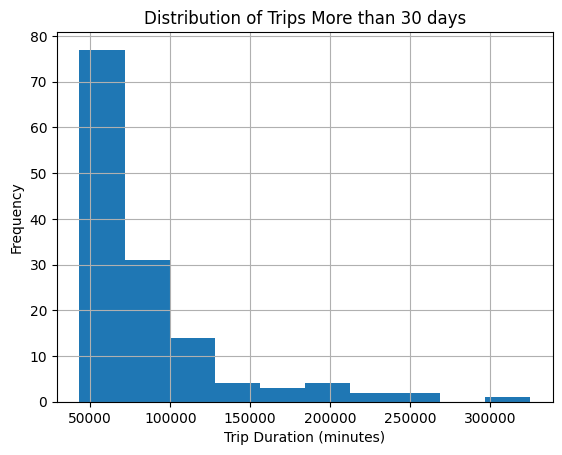

Trip duration more than 30 days: 138 mins


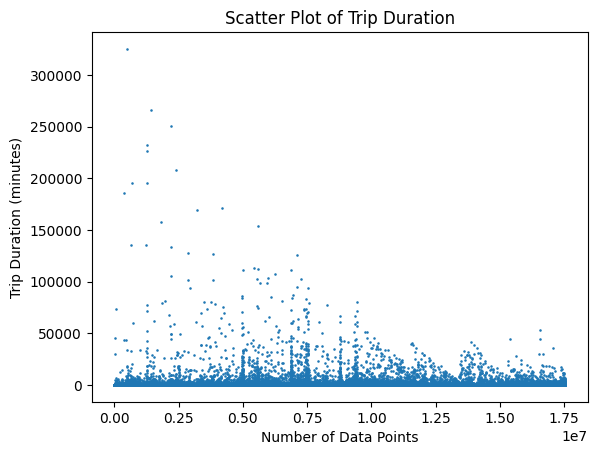

In [22]:
# Convert trip duration to minutes
df['trip_minutes'] = df.tripduration / 60

# Plot trip duration distribution
df.trip_minutes.hist()
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Trip Duration Distribution')
plt.show()

# Calculate maximum, minimum, and average trip duration
max_duration_days = (df.trip_minutes.max() / 60) / 24
min_duration_mins = df.trip_minutes.min()
avg_duration_mins = df.trip_minutes.mean()

print("Maximum rented duration: {:.2f} days or {:.2f} mins".format(max_duration_days, df.trip_minutes.max()))
print("Minimum rented duration: {:.2f} mins".format(min_duration_mins))
print("Average trip duration: {:.2f} mins".format(avg_duration_mins))

# Plot distribution of trips less than 30 mins
df[df.trip_minutes < 30].trip_minutes.hist()
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trips Less than 30 mins')
plt.show()

# Plot distribution of trips less than 60 mins
df[df.trip_minutes < 60].trip_minutes.hist()
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trips Less than 60 mins')
plt.show()

# Plot distribution of trips less than 24 hours
df[df.trip_minutes < 1440].trip_minutes.hist()
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trips Less than 24 hours')
plt.show()

# Calculate number of trips after one day
onedaytd = len(df[df.trip_minutes < 1440])

# Plot distribution of trips less than 7 days
df[df.trip_minutes < 10080].trip_minutes.hist()
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trips Less than 7 days')
plt.show()

# Calculate number of trips after one week
sevendaystd = len(df[df.trip_minutes < 10080])

print("Trip duration after one day: {} mins".format(sevendaystd - onedaytd))

# Plot distribution of trips more than 7 days
df[df.trip_minutes >= 10080].trip_minutes.hist()
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trips More than 7 days')
plt.show()

# Calculate number of trips more than 7 days
thirtydaystd = len(df[df.trip_minutes < 43200])

print("Trip duration more than 7 days: {} mins".format(thirtydaystd - sevendaystd))

# Plot distribution of trips more than 30 days
df[df.trip_minutes > 43200].trip_minutes.hist()
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Trips More than 30 days')
plt.show()

print("Trip duration more than 30 days: {} mins".format(len(df[df.trip_minutes > 43200])))

# Scatter plot of trip duration
plt.scatter(range(len(df.trip_minutes)), df.trip_minutes, s=0.7)
plt.xlabel('Number of Data Points')
plt.ylabel('Trip Duration (minutes)')
plt.title('Scatter Plot of Trip Duration')
plt.show()

# Visualisation of the station IDs


To visualize the distribution of station locations from the Trips_2018.csv, We created a distribution map. This map provides an immediate understanding of where the stations are situated, allowing for a quick and clear view of their spread across the area. This kind of visualization is especially useful for identifying patterns in station placement, understanding areas of high density, and recognizing potential gaps in the network.

In [23]:
# Remove duplicate rows based on station coordinates
dfff = df.drop_duplicates(subset=['start_station_longitude', 'start_station_latitude', 'end_station_longitude', 'end_station_latitude'])

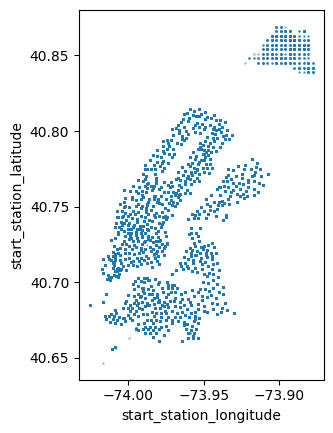

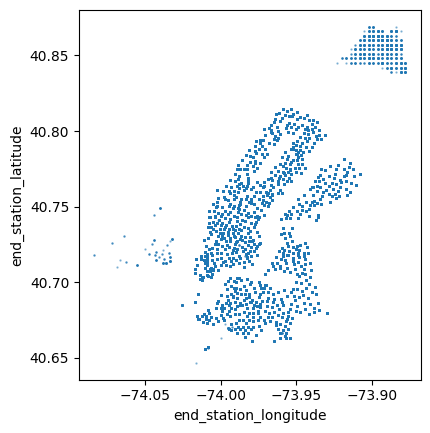

In [24]:
# Filter rows with specific longitude and latitude conditions
dfff = dfff.query('end_station_longitude < -73.8 and end_station_latitude < 41')
# Scatter plot for start station coordinates
dfff.plot.scatter(x='start_station_longitude', y='start_station_latitude',s=0.4, alpha=0.5).set_aspect('equal')
# Scatter plot for end station coordinates
dfff.plot.scatter(x='end_station_longitude', y='end_station_latitude',s=0.4, alpha=0.5).set_aspect('equal')

The distribution map of the station locations reveals the outline of New York City, showing how the stations are spread across the city.

# Gender

Next, to take into account the gender differences among users, we will also count and analyze the data based on gender.

number of males:  11971322
number of females:  4092462
number of unknowns:  1484555
percentage of males from known:  74.5236738741009  %
percentage of females from known:  9.241627003948759  %
percentage of unknown data :  8.45980351758648  %


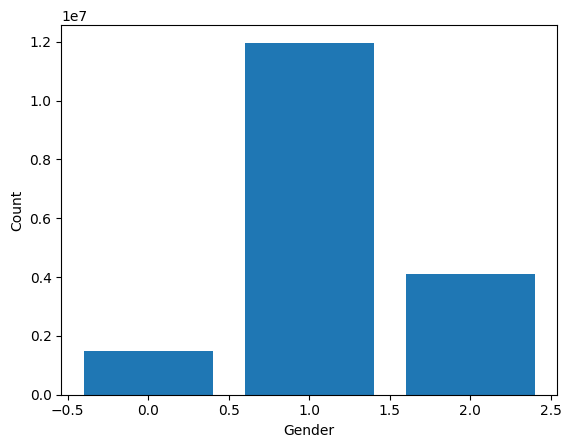

In [25]:
males=df['gender'].value_counts()[1]
females=df['gender'].value_counts()[2]
unknown=df['gender'].value_counts()[0]

print("number of males: ",df['gender'].value_counts()[1])
print("number of females: ",df['gender'].value_counts()[2])
print("number of unknowns: ",df['gender'].value_counts()[0])

print("percentage of males from known: ",(df['gender'].value_counts()[1]/(df['gender'].value_counts()[1]+ df['gender'].value_counts()[2]))*100," %")

print("percentage of females from known: ",(df['gender'].value_counts()[0]/(df['gender'].value_counts()[1]+ df['gender'].value_counts()[2]))*100," %")

print("percentage of unknown data : ",(df['gender'].value_counts()[0]/(df['gender'].value_counts()[0]+df['gender'].value_counts()[1]+ df['gender'].value_counts()[2]))*100," %")

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Assuming 'gender' column contains categorical data like 'male', 'female', 'unknown'
gender_counts = df['gender'].value_counts()

# Create a bar chart to visualize the distribution of genders
plt.bar(gender_counts.index, gender_counts.values)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The data shows that male users dominate Citi Bike usage (about 74.5%), female users represent a smaller proportion (about 9.2%), and around 8.5% of the records have unknown gender.

# Birth

Differences in birth periods could potentially be a significant factor for predictions, necessitating their categorization in the analysis.

oldest rider age:  133
youngest rider age:  16


,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,trip_minutes
2787,2787,944,2018-01-27 11:41:22.7260,2018-01-27 11:57:06.8930,82.0,40.711174,-74.000165,2008.0,40.705693,-74.016777,19760,Subscriber,1900,1,15.733333
14413,14413,595,2018-01-27 17:14:29.9340,2018-01-27 17:24:24.9360,151.0,40.722104,-73.997249,368.0,40.730386,-74.002150,14958,Subscriber,1918,1,9.916667
14489,14489,518,2018-01-28 14:32:51.2550,2018-01-28 14:41:29.2800,151.0,40.722104,-73.997249,361.0,40.716059,-73.991908,33390,Subscriber,1918,1,8.633333
17277,17277,663,2018-01-16 18:13:56.2490,2018-01-16 18:24:59.9440,161.0,40.729170,-73.998102,152.0,40.714740,-74.009106,31117,Subscriber,1912,0,11.050000
17404,17404,844,2018-01-18 16:04:22.0420,2018-01-18 16:18:26.8830,161.0,40.729170,-73.998102,534.0,40.702551,-74.012723,21654,Subscriber,1912,0,14.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17543778,17543778,523,2018-12-31 14:03:27.3290,2018-12-31 14:12:10.7260,3414.0,40.680945,-73.975673,3673.0,40.677592,-73.955637,33166,Subscriber,1895,1,8.716667
17544295,17544295,417,2018-12-31 14:25:45.6910,2018-12-31 14:32:43.4210,297.0,40.734232,-73.986923,3711.0,40.729667,-73.980680,35117,Subscriber,1890,2,6.950000
17546200,17546200,192,2018-12-31 16:11:30.2290,2018-12-31 16:14:43.2250,545.0,40.736502,-73.978095,487.0,40.733143,-73.975739,16285,Subscriber,1900,1,3.200000
17546343,17546343,626,2018-12-31 16:22:31.2100,2018-12-31 16:32:57.4530,267.0,40.750977,-73.987654,380.0,40.734011,-74.002939,35147,Subscriber,1917,1,10.433333


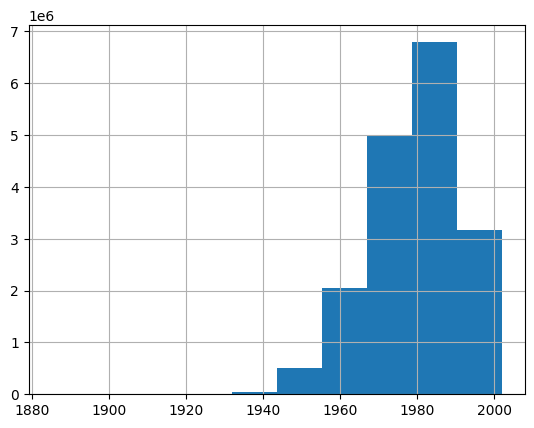

In [26]:
# Analyze Birth Year Data to Determine Age of Riders
df.birth_year.hist()
year = 2018
print("oldest rider age: ", year - df.birth_year.min())
print("youngest rider age: ", year - df.birth_year.max())
min_birth_year = df['birth_year'].min()

# Display entries for the oldest riders
df[df['birth_year'] == min_birth_year]

# Display entries for riders born before 1920
df[df['birth_year'] < 1920]

This histogram displays the birth year distribution of bicycle users. The distribution is heavily concentrated between 1960 and 2000, peaking in the 1980s. This suggests that the majority of users are likely in their 30s and 40s.

# User type

We will also consider whether users are members or not.

In [27]:
# Calculate and Print Percentage of Subscriber and Customer Usertypes

subs = df.usertype.value_counts()['Subscriber']
cus = df.usertype.value_counts()['Customer']
total = subs + cus

print("percentage of subscriber: ", subs / total, " %")
print("percentage of customer: ", cus / total, " %")

percentage of subscriber:  0.8898178340411591  %
percentage of customer:  0.1101821659588409  %


# Datetime

Next, we summarized the number of users by time and month, which is particularly important information for prediction.

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 718994  843114  976672 1307543 1824710 1953103 1913625 1977177 1877884
 1878657 1260355 1016505]
Number of unique start station IDs: 819
Number of unique end station IDs: 851
Number of unique bike IDs: 15244


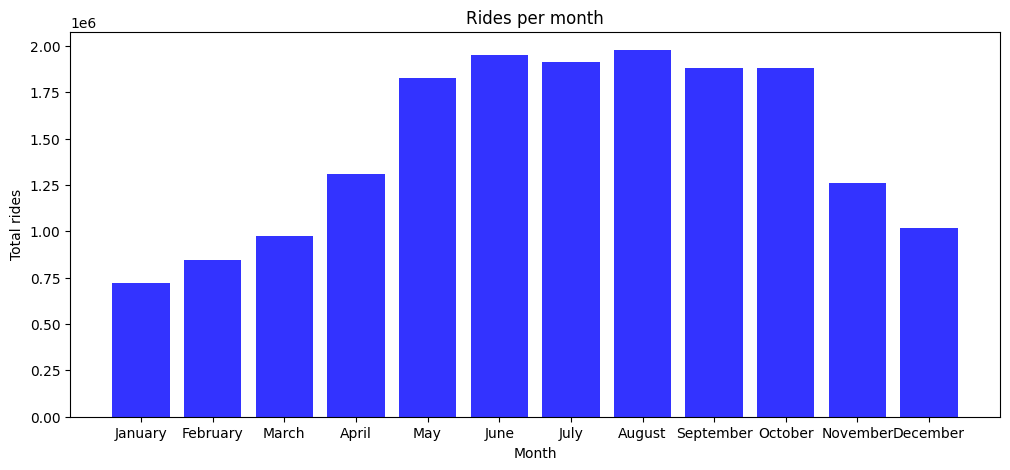

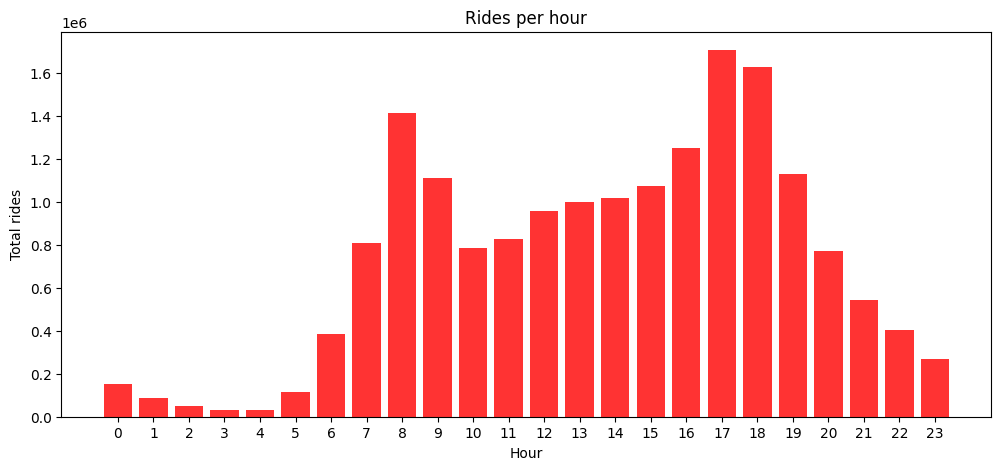

In [28]:
# Convert start and stop time columns to datetime
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

# Extract date from start and stop time
df['start_date'] = df['starttime'].dt.date
df['stop_date'] = df['stoptime'].dt.date

names_list=df['starttime'].dt.month.value_counts().sort_index().index.values
values_list=df['starttime'].dt.month.value_counts().sort_index().values
print(names_list)
print(values_list)

# Create a range of months from 1 to 12
months = range(1, 13)

# Count the number of rides per month
monthly_rides = df['starttime'].dt.month.value_counts().sort_index()

# Extract month names and ride counts as lists
month_names = [pd.Timestamp(year=2020, month=m, day=1).strftime('%B') for m in months]
ride_counts = [monthly_rides.get(m, 0) for m in months]

# Plot bar chart for rides per month
fig, ax = plt.subplots(figsize=(12, 5))
plt.bar(np.arange(len(ride_counts)), ride_counts, align='center', alpha=0.8, color='blue')
plt.xticks(np.arange(len(month_names)), month_names)
plt.ylabel('Total rides')
plt.xlabel('Month')
plt.title('Rides per month')

# Count the number of rides per hour
hourly_rides = df['starttime'].dt.hour.value_counts().sort_index()

# Extract hour names and ride counts as lists
hour_names = hourly_rides.index.values
ride_counts_hourly = hourly_rides.values

# Plot bar chart for rides per hour
fig, ax = plt.subplots(figsize=(12, 5))
plt.bar(np.arange(len(ride_counts_hourly)), ride_counts_hourly, align='center', alpha=0.8, color='red')
plt.xticks(np.arange(len(hour_names)), hour_names)
plt.ylabel('Total rides')
plt.xlabel('Hour')
plt.title('Rides per hour')

# Print unique values for start station ID, end station ID, and bike ID
print("Number of unique start station IDs:", len(df['start_station_id'].unique()))
print("Number of unique end station IDs:", len(df['end_station_id'].unique()))
print("Number of unique bike IDs:", len(df['bikeid'].unique()))

Higher Trip duration in the months the months of May , June , July , August , September and October. Could be due to the warmer weather conditions as compared to the other colder months.

Higher trip durations during peak hours from 8 am to 9 am and 5pm to 6 pm

Trip Duration (seconds) Start time and date Stop time and date Start station name End station name Station ID Customer(Subscriber/Customer) Gender( 0: Unknown, 1: male, 2:female)

# PART 2 Prediction

In [7]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

df['start_date'] = df['starttime'].dt.date
df['stop_date'] = df['stoptime'].dt.date

In [8]:
trip_duration_outliers=df[df["tripduration"]>86400]
outliers_start_station_lat=df[df["start_station_latitude"]>40.9]
birth_year_outliers=df[df["birth_year"]<1943]
import pandas as pd
# Assuming outliers_start_station_lat, trip_duratio_outliers, and birth_year_outliers are DataFrames
all_outliers = pd.concat([outliers_start_station_lat, trip_duration_outliers, birth_year_outliers]).drop_duplicates()
# Step 2: Create a boolean mask for the original DataFrame
is_outlier = df.index.isin(all_outliers.index)
# Step 3: Filter out the outliers from the original DataFrame
dfc= df[~is_outlier]

# K Means Clustering

The cluster label in start staion or end staion should the same if the latitude and longitude are the same for both.
for example cluster A maybe be a start staion in some records and could also be the end station for some records , but the cluster label for both should say cluster A as they have the same coordinates which is a unique identifying point 

Below K means custering is performed just on a unique set of coordinates present in the dataset , these coordinates are clustering and a cluster label is created. 

Once the label is created , a mapping is done back to the dataframe which would represet each timestamp will have a start label cluster and end cluster label 

In [12]:
start_coordinates=dfc[['start_station_latitude','start_station_longitude']]
 
end_coordinates=dfc[['end_station_latitude','end_station_longitude']]
 
list1=list(zip(start_coordinates["start_station_latitude"].values,start_coordinates["start_station_longitude"].values))
unique_start=set(list1)
print(len(unique_start))
 
list2=list(zip(end_coordinates["end_station_latitude"].values,end_coordinates["end_station_longitude"].values))
unique_end=set(list2)
print(len(unique_end))
 
list_coordinates=list(set(unique_start|unique_end))
len(list_coordinates)
 
intersection = list(set(list1) & set(list2))
print("Common start and end stations:",len(intersection))
start_notend = list(set(list1) - set(list2))
print("stations in start and not in end stations:",len(start_notend))
end_notstart = list(set(list2) - set(list1))
print("stations in end and not in start stations:",len(end_notstart))
 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
data = np.array(list_coordinates)
 
scaler=StandardScaler()
clustering_data_scaled=scaler.fit_transform(data)
km1 = KMeans(n_clusters=30,random_state=42)
km1 = km1.fit(clustering_data_scaled)
clusters=km1.labels_
 
mapping={}
 
for i,j in enumerate(list_coordinates):
    mapping[j]=clusters[i]
list_start_cluster = [None] * len(start_coordinates)  # Initialize the list with None or any default value
 
for i, j in enumerate(list1):
    if j in mapping:
        list_start_cluster[i] = mapping[j]
list_end_cluster = [None] * len(end_coordinates)  # Initialize the list with None or any default value
 
for i, j in enumerate(list2):
    if j in mapping:
        list_end_cluster[i] = mapping[j]

817
845
Common start and end stations: 817
stations in start and not in end stations: 0
stations in end and not in start stations: 28


c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
dfc["start_cluster_labels"]=pd.DataFrame(list_start_cluster)
dfc["end_cluster_labels"]=pd.DataFrame(list_end_cluster)

max_demand_cluster=dfc["start_cluster_labels"].value_counts().idxmax()

C:\Users\adop\AppData\Local\Temp\ipykernel_17104\2735674870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["start_cluster_labels"]=pd.DataFrame(list_start_cluster)
C:\Users\adop\AppData\Local\Temp\ipykernel_17104\2735674870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["end_cluster_labels"]=pd.DataFrame(list_end_cluster)


In [14]:
dfc["start_cluster_labels"].value_counts().sort_values(ascending=False)

start_cluster_labels
12.0    2122241
15.0    1721762
1.0     1626172
6.0     1148847
14.0    1063997
19.0     976153
29.0     961885
3.0      958886
20.0     917228
26.0     658695
27.0     644532
2.0      549421
9.0      520397
17.0     457395
22.0     380710
21.0     337968
25.0     315140
10.0     300359
5.0      279795
24.0     242894
8.0      235957
28.0     225211
4.0      182024
11.0     176043
16.0     123997
0.0      122760
13.0     118768
18.0      74858
Name: count, dtype: int64

A new dataframe is created which only represent values of cluster with max demand and further split and training is done following.

In [15]:
df1 = dfc[dfc['start_cluster_labels'] == max_demand_cluster] #df1 is the dataframe for the cluster with most pickups

#separating train and test data
train = df1[df1['starttime'].dt.month <= 10] 
test_pickups = df1[df1['starttime'].dt.month > 10]
test_dropoffs = df1[df1['stoptime'].dt.month > 10]

#sum the number of trips of each our of each day
train['hour'] = train['starttime'].dt.hour
train['date'] = train['starttime'].dt.date
train = train.groupby(['date', 'hour']).size().reset_index(name='counts')
train

C:\Users\adop\AppData\Local\Temp\ipykernel_17104\1848548000.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['hour'] = train['starttime'].dt.hour
C:\Users\adop\AppData\Local\Temp\ipykernel_17104\1848548000.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = train['starttime'].dt.date


,date,hour,counts
0,2018-01-01,0,10
1,2018-01-01,1,16
2,2018-01-01,2,12
3,2018-01-01,3,11
4,2018-01-01,4,1
...,...,...,...
7254,2018-10-31,19,504
7255,2018-10-31,20,355
7256,2018-10-31,21,285
7257,2018-10-31,22,250


## Training the model

We create lagged variables of the pickups , reprented as the counts column for +1 +2 and -1 -2 hours . This is because , when we train the data on day 0  ,the prediction of Day 1 for a given time interval say 10 am can also be interpreted from the values of pickups in the time interval before and after from the previous day

In [16]:
from sklearn import neural_network

#add features to our train data
train['lag1'] = train['counts'].shift(1)
train['lag2'] = train['counts'].shift(2)
train['lag-1'] = train['counts'].shift(-1)
train['lag-2'] = train['counts'].shift(-2)


train['month'] = pd.to_datetime(train['date']).dt.month
train['day'] = pd.to_datetime(train['date']).dt.day
train['dayofweek'] = pd.to_datetime(train['date']).dt.dayofweek
train

,date,hour,counts,lag1,lag2,lag-1,lag-2,month,day,dayofweek
0,2018-01-01,0,10,NaN,NaN,16.0,12.0,1,1,0
1,2018-01-01,1,16,10.0,NaN,12.0,11.0,1,1,0
2,2018-01-01,2,12,16.0,10.0,11.0,1.0,1,1,0
3,2018-01-01,3,11,12.0,16.0,1.0,3.0,1,1,0
4,2018-01-01,4,1,11.0,12.0,3.0,7.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
7254,2018-10-31,19,504,792.0,974.0,355.0,285.0,10,31,2
7255,2018-10-31,20,355,504.0,792.0,285.0,250.0,10,31,2
7256,2018-10-31,21,285,355.0,504.0,250.0,178.0,10,31,2
7257,2018-10-31,22,250,285.0,355.0,178.0,NaN,10,31,2


In [17]:
train = train.fillna(0)

#sepereate features from target
x = train[['hour', 'lag1', 'lag2', 'lag-1', 'lag-2', 'month', 'day', 'dayofweek']]
y = train['counts']

#train the model
model = neural_network.MLPRegressor()
model.fit(x, y)
train

,date,hour,counts,lag1,lag2,lag-1,lag-2,month,day,dayofweek
0,2018-01-01,0,10,0.0,0.0,16.0,12.0,1,1,0
1,2018-01-01,1,16,10.0,0.0,12.0,11.0,1,1,0
2,2018-01-01,2,12,16.0,10.0,11.0,1.0,1,1,0
3,2018-01-01,3,11,12.0,16.0,1.0,3.0,1,1,0
4,2018-01-01,4,1,11.0,12.0,3.0,7.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
7254,2018-10-31,19,504,792.0,974.0,355.0,285.0,10,31,2
7255,2018-10-31,20,355,504.0,792.0,285.0,250.0,10,31,2
7256,2018-10-31,21,285,355.0,504.0,250.0,178.0,10,31,2
7257,2018-10-31,22,250,285.0,355.0,178.0,0.0,10,31,2


In [18]:
#Calculate the number of parameters
total_params = sum(param.size for param in model.coefs_) + sum(param.size for param in model.intercepts_)

print("Total number of parameters in the model:", total_params)

Total number of parameters in the model: 1001


In [34]:
import random
from sklearn.metrics import mean_squared_error, r2_score
#pick a random day from the test set
random_day = random.choice(pd.date_range(start='2018-11-01', end='2018-12-31'))
day_to_predict = random_day + pd.DateOffset(days=1)

#pickups and dropoffs for the day to predict grouped by hour (targets)
y_test_pickups = test_pickups[test_pickups['starttime'].dt.date == day_to_predict.date()].groupby(test_pickups['starttime'].dt.hour).size().reset_index(name='counts')
y_test_dropoffs = test_dropoffs[test_dropoffs['stoptime'].dt.date == day_to_predict.date()].groupby(test_dropoffs['stoptime'].dt.hour).size().reset_index(name='counts')

#pickups and dropoffs for the random day grouped by hour(features)
x_test_pickups = test_pickups[test_pickups['starttime'].dt.date == random_day.date()].groupby(test_pickups['starttime'].dt.hour).size().reset_index(name='counts')
x_test_dropoffs = test_dropoffs[test_dropoffs['stoptime'].dt.date == random_day.date()].groupby(test_dropoffs['stoptime'].dt.hour).size().reset_index(name='counts')

#rename columns
y_test_pickups = y_test_pickups.rename(columns={'starttime': 'hour'})
y_test_dropoffs = y_test_dropoffs.rename(columns={'stoptime': 'hour'})

x_test_pickups = x_test_pickups.rename(columns={'starttime': 'hour'})
x_test_dropoffs = x_test_dropoffs.rename(columns={'stoptime': 'hour'})

#fill in missing hours (where the count is 0)
all_hours = pd.DataFrame({'hour': range(24)})

y_test_pickups = all_hours.merge(y_test_pickups, on='hour', how='left')
y_test_pickups['counts'].fillna(0, inplace=True)
y_test_dropoffs = all_hours.merge(y_test_dropoffs, on='hour', how='left')
y_test_dropoffs['counts'].fillna(0, inplace=True)

x_test_pickups = all_hours.merge(x_test_pickups, on='hour', how='left')
x_test_pickups['counts'].fillna(0, inplace=True)
x_test_dropoffs = all_hours.merge(x_test_dropoffs, on='hour', how='left')
x_test_dropoffs['counts'].fillna(0, inplace=True)

#add features to our test set
x_test_pickups = pd.concat([x_test_pickups.tail(2), x_test_pickups, x_test_pickups.head(2)])
x_test_pickups['lag1'] = x_test_pickups['counts'].shift(1)
x_test_pickups['lag2'] = x_test_pickups['counts'].shift(2)
x_test_pickups['lag-1'] = x_test_pickups['counts'].shift(-1)
x_test_pickups['lag-2'] = x_test_pickups['counts'].shift(-2)
x_test_pickups['month'] = random_day.month
x_test_pickups['day'] = random_day.day
x_test_pickups['dayofweek'] = random_day.dayofweek
x_test_pickups = x_test_pickups.dropna()

x_test_dropoffs = pd.concat([x_test_dropoffs.tail(2), x_test_dropoffs, x_test_dropoffs.head(2)])
x_test_dropoffs['lag1'] = x_test_dropoffs['counts'].shift(1)
x_test_dropoffs['lag2'] = x_test_dropoffs['counts'].shift(2)
x_test_dropoffs['lag-1'] = x_test_dropoffs['counts'].shift(-1)
x_test_dropoffs['lag-2'] = x_test_dropoffs['counts'].shift(-2)
x_test_dropoffs['month'] = random_day.month
x_test_dropoffs['day'] = random_day.day
x_test_dropoffs['dayofweek'] = random_day.dayofweek
x_test_dropoffs = x_test_dropoffs.dropna()

#separate columns for predicting
x_test_pickups = x_test_pickups[['hour', 'lag1', 'lag2', 'lag-1', 'lag-2', 'month', 'day', 'dayofweek']]
y_test_pickups = y_test_pickups['counts'].values

x_test_dropoffs = x_test_dropoffs[['hour', 'lag1', 'lag2', 'lag-1', 'lag-2', 'month', 'day', 'dayofweek']]
y_test_dropoffs = y_test_dropoffs['counts'].values

### Benchmarking using Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear_pickups = linear_model.predict(x_test_pickups)
mse_linear = mean_squared_error(y_test_pickups, y_pred_linear_pickups)
r2_linear = r2_score(y_test_pickups, y_pred_linear_pickups)
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R2: {r2_linear}")

y_pred_linear_dropoffs = linear_model.predict(x_test_dropoffs)
mse_linear = mean_squared_error(y_test_dropoffs, y_pred_linear_dropoffs)
r2_linear = r2_score(y_test_dropoffs, y_pred_linear_dropoffs)
print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R2: {r2_linear}")

Linear Regression MSE: 4459.977292689313
Linear Regression R2: 0.7576455795169543
Linear Regression MSE: 4193.535216946949
Linear Regression R2: 0.7687686207502555


In [22]:
from sklearn.linear_model import Ridge, Lasso
# Ridge regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x, y)
# Evaluate Ridge regression
# Lasso regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x, y)
# Evaluate Lasso regression

Lasso(alpha=0.1)

In [23]:
# Evaluation for Ridge Regression
y_pred_ridge_pickups = ridge_model.predict(x_test_pickups)
mse_ridge_pickups = mean_squared_error(y_test_pickups, y_pred_ridge_pickups)
r2_ridge_pickups = r2_score(y_test_pickups, y_pred_ridge_pickups)

y_pred_ridge_dropoffs = ridge_model.predict(x_test_dropoffs)
mse_ridge_dropoffs = mean_squared_error(y_test_dropoffs, y_pred_ridge_dropoffs)
r2_ridge_dropoffs = r2_score(y_test_dropoffs, y_pred_ridge_dropoffs)

print("Ridge Regression - Pickups")
print(f"MSE: {mse_ridge_pickups}, R2: {r2_ridge_pickups}")
print("Ridge Regression - Dropoffs")
print(f"MSE: {mse_ridge_dropoffs}, R2: {r2_ridge_dropoffs}")

# Evaluation for Lasso Regression
y_pred_lasso_pickups = lasso_model.predict(x_test_pickups)
mse_lasso_pickups = mean_squared_error(y_test_pickups, y_pred_lasso_pickups)
r2_lasso_pickups = r2_score(y_test_pickups, y_pred_lasso_pickups)

y_pred_lasso_dropoffs = lasso_model.predict(x_test_dropoffs)
mse_lasso_dropoffs = mean_squared_error(y_test_dropoffs, y_pred_lasso_dropoffs)
r2_lasso_dropoffs = r2_score(y_test_dropoffs, y_pred_lasso_dropoffs)

print("Lasso Regression - Pickups")
print(f"MSE: {mse_lasso_pickups}, R2: {r2_lasso_pickups}")
print("Lasso Regression - Dropoffs")
print(f"MSE: {mse_lasso_dropoffs}, R2: {r2_lasso_dropoffs}")

Ridge Regression - Pickups
MSE: 4459.972690713311, R2: 0.757645829587561
Ridge Regression - Dropoffs
MSE: 4193.5307942029085, R2: 0.768768864620201
Lasso Regression - Pickups
MSE: 4456.900390946764, R2: 0.75781277784326
Lasso Regression - Dropoffs
MSE: 4190.546124681655, R2: 0.7689334391889837


In [24]:
def print_actual_vs_predicted_pickups(specific_date, df, x_test, y_test, model):
    # Convert specific_date to datetime if it's not already
    specific_date = pd.to_datetime(specific_date).date()

    # Filter the test features and labels for the specific date
    x_test_date = x_test[x_test[''] == specific_date]
    y_test_date = y_test[df['date'] == specific_date]

    # Predict pickups for the specific date
    y_pred_date = model.predict(x_test_date)

    # Print actual and predicted values
    for actual, predicted in zip(y_test_date, y_pred_date):
        print(f"Date: {specific_date}, Actual Pickups: {actual}, Predicted Pickups: {predicted}")


In [25]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

optimized_model = MLPRegressor()
optimized_model.fit(x, y)

MLPRegressor()

In [27]:
import random
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

dates_testset = [pd.Timestamp('2018-11-01'), pd.Timestamp('2018-12-03'), pd.Timestamp('2018-12-26'),pd.Timestamp('2018-12-08'),pd.Timestamp('2018-12-06'),pd.Timestamp('2018-12-11'),pd.Timestamp('2018-12-05'),pd.Timestamp('2018-12-12'),pd.Timestamp('2018-12-17'),pd.Timestamp('2018-11-17'),pd.Timestamp('2018-11-23')]

# Replace this with your specific date
specific_day = random.choice(dates_testset)
day_to_predict = specific_day + pd.DateOffset(days=1)
print('Specific day:', specific_day.date())

# Pickups and dropoffs for the day to predict grouped by hour (targets)
y_test_pickups = test_pickups[test_pickups['starttime'].dt.date == day_to_predict.date()].groupby(test_pickups['starttime'].dt.hour).size().reset_index(name='counts')
y_test_dropoffs = test_dropoffs[test_dropoffs['stoptime'].dt.date == day_to_predict.date()].groupby(test_dropoffs['stoptime'].dt.hour).size().reset_index(name='counts')

# Pickups and dropoffs for the specific day grouped by hour (features)
x_test_pickups = test_pickups[test_pickups['starttime'].dt.date == specific_day.date()].groupby(test_pickups['starttime'].dt.hour).size().reset_index(name='counts')
x_test_dropoffs = test_dropoffs[test_dropoffs['stoptime'].dt.date == specific_day.date()].groupby(test_dropoffs['stoptime'].dt.hour).size().reset_index(name='counts')

# Rename columns
y_test_pickups = y_test_pickups.rename(columns={'starttime': 'hour'})
y_test_dropoffs = y_test_dropoffs.rename(columns={'stoptime': 'hour'})

x_test_pickups = x_test_pickups.rename(columns={'starttime': 'hour'})
x_test_dropoffs = x_test_dropoffs.rename(columns={'stoptime': 'hour'})

# Fill in missing hours (where the count is 0)
all_hours = pd.DataFrame({'hour': range(24)})

y_test_pickups = all_hours.merge(y_test_pickups, on='hour', how='left')
y_test_pickups['counts'].fillna(0, inplace=True)
y_test_dropoffs = all_hours.merge(y_test_dropoffs, on='hour', how='left')
y_test_dropoffs['counts'].fillna(0, inplace=True)

x_test_pickups = all_hours.merge(x_test_pickups, on='hour', how='left')
x_test_pickups['counts'].fillna(0, inplace=True)
x_test_dropoffs = all_hours.merge(x_test_dropoffs, on='hour', how='left')
x_test_dropoffs['counts'].fillna(0, inplace=True)

# Add features to our test set
x_test_pickups = pd.concat([x_test_pickups.tail(2), x_test_pickups, x_test_pickups.head(2)])
x_test_pickups['lag1'] = x_test_pickups['counts'].shift(1)
x_test_pickups['lag2'] = x_test_pickups['counts'].shift(2)
x_test_pickups['lag-1'] = x_test_pickups['counts'].shift(-1)
x_test_pickups['lag-2'] = x_test_pickups['counts'].shift(-2)
x_test_pickups['month'] = specific_day.month
x_test_pickups['day'] = specific_day.day
x_test_pickups['dayofweek'] = specific_day.dayofweek
x_test_pickups = x_test_pickups.dropna()

x_test_dropoffs = pd.concat([x_test_dropoffs.tail(2), x_test_dropoffs, x_test_dropoffs.head(2)])
x_test_dropoffs['lag1'] = x_test_dropoffs['counts'].shift(1)
x_test_dropoffs['lag2'] = x_test_dropoffs['counts'].shift(2)
x_test_dropoffs['lag-1'] = x_test_dropoffs['counts'].shift(-1)
x_test_dropoffs['lag-2'] = x_test_dropoffs['counts'].shift(-2)
x_test_dropoffs['month'] = specific_day.month
x_test_dropoffs['day'] = specific_day.day
x_test_dropoffs['dayofweek'] = specific_day.dayofweek
x_test_dropoffs = x_test_dropoffs.dropna()

# Separate columns for predicting
x_test_pickups = x_test_pickups[['hour', 'lag1', 'lag2', 'lag-1', 'lag-2', 'month', 'day', 'dayofweek']]
y_test_pickups = y_test_pickups['counts'].values

x_test_dropoffs = x_test_dropoffs[['hour', 'lag1', 'lag2', 'lag-1', 'lag-2', 'month', 'day', 'dayofweek']]
y_test_dropoffs = y_test_dropoffs['counts'].values
y_pred_pickups = optimized_model.predict(x_test_pickups)
y_pred_dropoffs = optimized_model.predict(x_test_dropoffs)

#evaluate
r2_pickups = r2_score(y_test_pickups, y_pred_pickups)
r2_dropoffs = r2_score(y_test_dropoffs, y_pred_dropoffs)
mse_pickups = mean_squared_error(y_test_pickups, y_pred_pickups)
mse_dropoffs = mean_squared_error(y_test_dropoffs, y_pred_dropoffs)

#show results
res = pd.DataFrame({'Actual_Pickups': y_test_pickups, 'Predicted_Pickups': y_pred_pickups, 'Actual_Dropoffs': y_test_dropoffs, 'Predicted_Dropoffs': y_pred_dropoffs})
print('r2 score for pickups:', r2_pickups)
print('r2 score for dropoffs:', r2_dropoffs)
print('mse for pickups:', mse_pickups)
print('mse for dropoffs:', mse_dropoffs)
res


Specific day: 2018-12-17
r2 score for pickups: 0.897690059975737
r2 score for dropoffs: 0.919723665190356
mse for pickups: 3848.6141508421138
mse for dropoffs: 2893.14516967589


,Actual_Pickups,Predicted_Pickups,Actual_Dropoffs,Predicted_Dropoffs
0,35,30.284861,37,34.071363
1,18,10.753575,23,13.115810
2,14,4.966005,11,2.754067
3,12,8.654166,13,12.171531
4,11,9.306350,12,7.770134
5,61,46.904623,43,37.606822
6,195,181.769723,175,152.097822
7,380,393.713621,336,346.889546
8,776,748.208551,710,724.215592
9,460,559.494702,542,584.815609


In [29]:
#2nd most demand cluster=8
second_demand_cluster=8

df1 = dfc[dfc['start_cluster_labels'] == second_demand_cluster] #df1 is the dataframe for the cluster with most pickups

#separating train and test data
train = df1[df1['starttime'].dt.month <= 10] 
test_pickups = df1[df1['starttime'].dt.month > 10]
test_dropoffs = df1[df1['stoptime'].dt.month > 10]

#sum the number of trips of each our of each day
train['hour'] = train['starttime'].dt.hour
train['date'] = train['starttime'].dt.date
train = train.groupby(['date', 'hour']).size().reset_index(name='counts')
from sklearn import neural_network

#add features to our train data
train['lag1'] = train['counts'].shift(1)
train['lag2'] = train['counts'].shift(2)
train['lag-1'] = train['counts'].shift(-1)
train['lag-2'] = train['counts'].shift(-2)


train['month'] = pd.to_datetime(train['date']).dt.month
train['day'] = pd.to_datetime(train['date']).dt.day
train['dayofweek'] = pd.to_datetime(train['date']).dt.dayofweek
train = train.fillna(0)

#sepereate features from target
x = train[['hour', 'lag1', 'lag2', 'lag-1', 'lag-2', 'month', 'day', 'dayofweek']]
y = train['counts']

optimized_model = MLPRegressor()
optimized_model.fit(x, y)
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

dates_testset = [pd.Timestamp('2018-11-01'), pd.Timestamp('2018-12-03'), pd.Timestamp('2018-12-26'),pd.Timestamp('2018-12-08'),pd.Timestamp('2018-12-06'),pd.Timestamp('2018-12-11'),pd.Timestamp('2018-12-05'),pd.Timestamp('2018-12-12'),pd.Timestamp('2018-12-17'),pd.Timestamp('2018-11-17'),pd.Timestamp('2018-11-23')]

C:\Users\adop\AppData\Local\Temp\ipykernel_17104\40140257.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['hour'] = train['starttime'].dt.hour
C:\Users\adop\AppData\Local\Temp\ipykernel_17104\40140257.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = train['starttime'].dt.date


In [30]:
specific_day = random.choice(dates_testset)
day_to_predict = specific_day + pd.DateOffset(days=1)
print('Specific day:', specific_day.date())

# Pickups and dropoffs for the day to predict grouped by hour (targets)
y_test_pickups = test_pickups[test_pickups['starttime'].dt.date == day_to_predict.date()].groupby(test_pickups['starttime'].dt.hour).size().reset_index(name='counts')
y_test_dropoffs = test_dropoffs[test_dropoffs['stoptime'].dt.date == day_to_predict.date()].groupby(test_dropoffs['stoptime'].dt.hour).size().reset_index(name='counts')

# Pickups and dropoffs for the specific day grouped by hour (features)
x_test_pickups = test_pickups[test_pickups['starttime'].dt.date == specific_day.date()].groupby(test_pickups['starttime'].dt.hour).size().reset_index(name='counts')
x_test_dropoffs = test_dropoffs[test_dropoffs['stoptime'].dt.date == specific_day.date()].groupby(test_dropoffs['stoptime'].dt.hour).size().reset_index(name='counts')

# Rename columns
y_test_pickups = y_test_pickups.rename(columns={'starttime': 'hour'})
y_test_dropoffs = y_test_dropoffs.rename(columns={'stoptime': 'hour'})

x_test_pickups = x_test_pickups.rename(columns={'starttime': 'hour'})
x_test_dropoffs = x_test_dropoffs.rename(columns={'stoptime': 'hour'})

# Fill in missing hours (where the count is 0)
all_hours = pd.DataFrame({'hour': range(24)})

y_test_pickups = all_hours.merge(y_test_pickups, on='hour', how='left')
y_test_pickups['counts'].fillna(0, inplace=True)
y_test_dropoffs = all_hours.merge(y_test_dropoffs, on='hour', how='left')
y_test_dropoffs['counts'].fillna(0, inplace=True)

x_test_pickups = all_hours.merge(x_test_pickups, on='hour', how='left')
x_test_pickups['counts'].fillna(0, inplace=True)
x_test_dropoffs = all_hours.merge(x_test_dropoffs, on='hour', how='left')
x_test_dropoffs['counts'].fillna(0, inplace=True)

# Add features to our test set
x_test_pickups = pd.concat([x_test_pickups.tail(2), x_test_pickups, x_test_pickups.head(2)])
x_test_pickups['lag1'] = x_test_pickups['counts'].shift(1)
x_test_pickups['lag2'] = x_test_pickups['counts'].shift(2)
x_test_pickups['lag-1'] = x_test_pickups['counts'].shift(-1)
x_test_pickups['lag-2'] = x_test_pickups['counts'].shift(-2)
x_test_pickups['month'] = specific_day.month
x_test_pickups['day'] = specific_day.day
x_test_pickups['dayofweek'] = specific_day.dayofweek
x_test_pickups = x_test_pickups.dropna()

x_test_dropoffs = pd.concat([x_test_dropoffs.tail(2), x_test_dropoffs, x_test_dropoffs.head(2)])
x_test_dropoffs['lag1'] = x_test_dropoffs['counts'].shift(1)
x_test_dropoffs['lag2'] = x_test_dropoffs['counts'].shift(2)
x_test_dropoffs['lag-1'] = x_test_dropoffs['counts'].shift(-1)
x_test_dropoffs['lag-2'] = x_test_dropoffs['counts'].shift(-2)
x_test_dropoffs['month'] = specific_day.month
x_test_dropoffs['day'] = specific_day.day
x_test_dropoffs['dayofweek'] = specific_day.dayofweek
x_test_dropoffs = x_test_dropoffs.dropna()

# Separate columns for predicting
x_test_pickups = x_test_pickups[['hour', 'lag1', 'lag2', 'lag-1', 'lag-2', 'month', 'day', 'dayofweek']]
y_test_pickups = y_test_pickups['counts'].values

x_test_dropoffs = x_test_dropoffs[['hour', 'lag1', 'lag2', 'lag-1', 'lag-2', 'month', 'day', 'dayofweek']]
y_test_dropoffs = y_test_dropoffs['counts'].values
y_pred_pickups = optimized_model.predict(x_test_pickups)
y_pred_dropoffs = optimized_model.predict(x_test_dropoffs)

#evaluate
r2_pickups = r2_score(y_test_pickups, y_pred_pickups)
r2_dropoffs = r2_score(y_test_dropoffs, y_pred_dropoffs)
mse_pickups = mean_squared_error(y_test_pickups, y_pred_pickups)
mse_dropoffs = mean_squared_error(y_test_dropoffs, y_pred_dropoffs)

#show results
res = pd.DataFrame({'Actual_Pickups': y_test_pickups, 'Predicted_Pickups': y_pred_pickups, 'Actual_Dropoffs': y_test_dropoffs, 'Predicted_Dropoffs': y_pred_dropoffs})
print('r2 score for pickups:', r2_pickups)
print('r2 score for dropoffs:', r2_dropoffs)
print('mse for pickups:', mse_pickups)
print('mse for dropoffs:', mse_dropoffs)
res

Specific day: 2018-12-05
r2 score for pickups: 0.7929130166354152
r2 score for dropoffs: 0.8655577721504495
mse for pickups: 106.45421428180568
mse for dropoffs: 61.65646608768998


,Actual_Pickups,Predicted_Pickups,Actual_Dropoffs,Predicted_Dropoffs
0,3.0,2.582662,5,2.557373
1,4.0,3.075124,4,2.940446
2,0.0,1.838002,1,2.176828
3,2.0,2.126988,2,2.179914
4,1.0,1.883937,1,2.261530
5,8.0,5.780130,7,5.295272
6,22.0,21.626033,20,18.028203
7,48.0,57.799035,42,44.282537
8,92.0,78.794556,84,86.020181
9,41.0,58.278999,51,58.779900


In [31]:
#3rd most demand cluster=8
third_demand_cluster=24

df1 = dfc[dfc['start_cluster_labels'] == third_demand_cluster] #df1 is the dataframe for the cluster with most pickups

#separating train and test data
train = df1[df1['starttime'].dt.month <= 10] 
test_pickups = df1[df1['starttime'].dt.month > 10]
test_dropoffs = df1[df1['stoptime'].dt.month > 10]

#sum the number of trips of each our of each day
train['hour'] = train['starttime'].dt.hour
train['date'] = train['starttime'].dt.date
train = train.groupby(['date', 'hour']).size().reset_index(name='counts')
from sklearn import neural_network

#add features to our train data
train['lag1'] = train['counts'].shift(1)
train['lag2'] = train['counts'].shift(2)
train['lag-1'] = train['counts'].shift(-1)
train['lag-2'] = train['counts'].shift(-2)


train['month'] = pd.to_datetime(train['date']).dt.month
train['day'] = pd.to_datetime(train['date']).dt.day
train['dayofweek'] = pd.to_datetime(train['date']).dt.dayofweek
train = train.fillna(0)

#sepereate features from target
x = train[['hour', 'lag1', 'lag2', 'lag-1', 'lag-2', 'month', 'day', 'dayofweek']]
y = train['counts']

optimized_model = MLPRegressor()
optimized_model.fit(x, y)
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

dates_testset = [pd.Timestamp('2018-11-01'), pd.Timestamp('2018-12-03'), pd.Timestamp('2018-12-26'),pd.Timestamp('2018-12-08'),pd.Timestamp('2018-12-06'),pd.Timestamp('2018-12-11'),pd.Timestamp('2018-12-05'),pd.Timestamp('2018-12-12'),pd.Timestamp('2018-12-17'),pd.Timestamp('2018-11-17'),pd.Timestamp('2018-11-23')]


C:\Users\adop\AppData\Local\Temp\ipykernel_17104\107174584.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['hour'] = train['starttime'].dt.hour
C:\Users\adop\AppData\Local\Temp\ipykernel_17104\107174584.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['date'] = train['starttime'].dt.date


In [32]:
specific_day = random.choice(dates_testset)
day_to_predict = specific_day + pd.DateOffset(days=1)
print('Specific day:', specific_day.date())

# Pickups and dropoffs for the day to predict grouped by hour (targets)
y_test_pickups = test_pickups[test_pickups['starttime'].dt.date == day_to_predict.date()].groupby(test_pickups['starttime'].dt.hour).size().reset_index(name='counts')
y_test_dropoffs = test_dropoffs[test_dropoffs['stoptime'].dt.date == day_to_predict.date()].groupby(test_dropoffs['stoptime'].dt.hour).size().reset_index(name='counts')

# Pickups and dropoffs for the specific day grouped by hour (features)
x_test_pickups = test_pickups[test_pickups['starttime'].dt.date == specific_day.date()].groupby(test_pickups['starttime'].dt.hour).size().reset_index(name='counts')
x_test_dropoffs = test_dropoffs[test_dropoffs['stoptime'].dt.date == specific_day.date()].groupby(test_dropoffs['stoptime'].dt.hour).size().reset_index(name='counts')

# Rename columns
y_test_pickups = y_test_pickups.rename(columns={'starttime': 'hour'})
y_test_dropoffs = y_test_dropoffs.rename(columns={'stoptime': 'hour'})

x_test_pickups = x_test_pickups.rename(columns={'starttime': 'hour'})
x_test_dropoffs = x_test_dropoffs.rename(columns={'stoptime': 'hour'})

# Fill in missing hours (where the count is 0)
all_hours = pd.DataFrame({'hour': range(24)})

y_test_pickups = all_hours.merge(y_test_pickups, on='hour', how='left')
y_test_pickups['counts'].fillna(0, inplace=True)
y_test_dropoffs = all_hours.merge(y_test_dropoffs, on='hour', how='left')
y_test_dropoffs['counts'].fillna(0, inplace=True)

x_test_pickups = all_hours.merge(x_test_pickups, on='hour', how='left')
x_test_pickups['counts'].fillna(0, inplace=True)
x_test_dropoffs = all_hours.merge(x_test_dropoffs, on='hour', how='left')
x_test_dropoffs['counts'].fillna(0, inplace=True)

# Add features to our test set
x_test_pickups = pd.concat([x_test_pickups.tail(2), x_test_pickups, x_test_pickups.head(2)])
x_test_pickups['lag1'] = x_test_pickups['counts'].shift(1)
x_test_pickups['lag2'] = x_test_pickups['counts'].shift(2)
x_test_pickups['lag-1'] = x_test_pickups['counts'].shift(-1)
x_test_pickups['lag-2'] = x_test_pickups['counts'].shift(-2)
x_test_pickups['month'] = specific_day.month
x_test_pickups['day'] = specific_day.day
x_test_pickups['dayofweek'] = specific_day.dayofweek
x_test_pickups = x_test_pickups.dropna()

x_test_dropoffs = pd.concat([x_test_dropoffs.tail(2), x_test_dropoffs, x_test_dropoffs.head(2)])
x_test_dropoffs['lag1'] = x_test_dropoffs['counts'].shift(1)
x_test_dropoffs['lag2'] = x_test_dropoffs['counts'].shift(2)
x_test_dropoffs['lag-1'] = x_test_dropoffs['counts'].shift(-1)
x_test_dropoffs['lag-2'] = x_test_dropoffs['counts'].shift(-2)
x_test_dropoffs['month'] = specific_day.month
x_test_dropoffs['day'] = specific_day.day
x_test_dropoffs['dayofweek'] = specific_day.dayofweek
x_test_dropoffs = x_test_dropoffs.dropna()

# Separate columns for predicting
x_test_pickups = x_test_pickups[['hour', 'lag1', 'lag2', 'lag-1', 'lag-2', 'month', 'day', 'dayofweek']]
y_test_pickups = y_test_pickups['counts'].values

x_test_dropoffs = x_test_dropoffs[['hour', 'lag1', 'lag2', 'lag-1', 'lag-2', 'month', 'day', 'dayofweek']]
y_test_dropoffs = y_test_dropoffs['counts'].values
y_pred_pickups = optimized_model.predict(x_test_pickups)
y_pred_dropoffs = optimized_model.predict(x_test_dropoffs)

#evaluate
r2_pickups = r2_score(y_test_pickups, y_pred_pickups)
r2_dropoffs = r2_score(y_test_dropoffs, y_pred_dropoffs)
mse_pickups = mean_squared_error(y_test_pickups, y_pred_pickups)
mse_dropoffs = mean_squared_error(y_test_dropoffs, y_pred_dropoffs)

#show results
res = pd.DataFrame({'Actual_Pickups': y_test_pickups, 'Predicted_Pickups': y_pred_pickups, 'Actual_Dropoffs': y_test_dropoffs, 'Predicted_Dropoffs': y_pred_dropoffs})
print('r2 score for pickups:', r2_pickups)
print('r2 score for dropoffs:', r2_dropoffs)
print('mse for pickups:', mse_pickups)
print('mse for dropoffs:', mse_dropoffs)
res

Specific day: 2018-12-11
r2 score for pickups: 0.8711768661068555
r2 score for dropoffs: 0.8542554723151873
mse for pickups: 78.4852706731241
mse for dropoffs: 86.80275858491915


,Actual_Pickups,Predicted_Pickups,Actual_Dropoffs,Predicted_Dropoffs
0,4.0,5.245617,3,6.083236
1,1.0,1.911180,1,2.232355
2,1.0,3.662101,1,3.891823
3,0.0,2.518995,1,1.411527
4,1.0,1.459241,1,1.513599
5,12.0,11.592799,11,8.566826
6,24.0,21.841354,21,21.121437
7,59.0,56.567117,54,49.430902
8,98.0,81.191981,92,78.457885
9,38.0,43.783952,51,52.913685


# conclusion from the prediction of pickups and dropoffs from the 3 clusters:


The predicting accuracy for three clusters varies. Cluster 1 predictions are highly accurate, with a r2 score of roughly 0.94 for both pickups and dropoffs and a smaller mean squared error (MSE), indicating a significant connection between the actual and projected values. Cluster 2 has high r2 values, indicating a solid model fit, but somewhat higher MSEs, indicating larger average squared prediction errors. Cluster 3 has the largest MSEs, indicating wider disparities between actual and projected values, but still exhibiting respectable accuracy with r2 scores over 0.79. Overall, the strong r2 values across all clusters indicate that the models are efficiently capturing the volatility in the data, but the variable MSEs indicate that prediction accuracy should be improved. 

Improving the model may need integrating more detailed data, such as weather conditions, special events, or traffic patterns that may influence taxi demand. Furthermore, adopting more complicated machine learning techniques or upgrading current models might boost forecast accuracy even further. We did try including the weather data and doing the one hot encoding of the month ,hours and day columns which increased the complexity drastically .We then performed PCA and used various models to try and predict but we could not succeed to lower the error so instead decided to use Linear Regression as baseline and MLP Regressor for prediction.

# Comparision with baseline
Linear Regression: The Linear Regression model has a r2 score of 0.9319 for pickups and 0.9444 for dropoffs, with MSEs of 1180.578 and 948.744 for pickups and dropoffs, respectively. These scores are fairly high, indicating a good fit, but the MSEs, particularly for pickups, are higher than in Cluster 1 (MSEs: 1430.175 for pickups and 1072.249 for dropoffs), implying that the Linear Regression model may be less accurate in predicting the exact number of pickups and dropoffs.
Ridge and Lasso Regression: With slightly different MSEs but virtually equal r2 scores, the Ridge and Lasso Regression models perform extremely similarly to the Linear Regression model. The Lasso Regression model, for example, has a r2 score of 0.9320 for pickups and 0.9445 for dropoffs, with MSEs of 1178.887 and 947.141, which are extremely close to the Linear Regression findings.

In comparison, all clusters had r2 scores more than 0.79, with Clusters 1 and 2 having exceptionally good fits (above 0.93). The MSEs in the cluster models, particularly Cluster 3, were, on average, greater than those in the benchmark models.

## Task 3
Using the predicted values for each hour for pickups and drop-offs a delta value can be calculated; ‘Predicted_Pickups-Predicted_Dropoffs’ . This then results in an hourly delta which can be used to calculate the daily cumulative data. 
Since the positive values indicate the need for extra bikes, the goal is to determine the most positive value so ‘max(cum(daily_delta))’. This number needs to be rounded up to represent the real world.
Example for a random day within the testing data:
Using CLUSTER 3 for this 

In [33]:
print(np.ceil(max(np.cumsum(res['Predicted_Pickups'] - res['Predicted_Dropoffs']))))

14.0


# PART 3 Exploratory

**Research Question:**
Do varying weather conditions and seasonal changes, affect the usage patterns of bike-sharing in terms of overall ridership and can this be forecasted?
The weather data is found online. The weather data uses a latitude=40.71 & longitude=-74.01 for all the data since it's assumed that closely related stations have similar weather conditions.

Source: https://open-meteo.com/en/docs/historical-weather-api#latitude=40.71&longitude=-74.01&hourly=temperature_2m,precipitation,rain,snowfall,snow_depth&daily=

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
import os
#os.chdir('C:/Users/oskar/OneDrive/Skrivebord')

import pandas as pd
# Read the file
df = pd.read_csv('Trips_2018.csv')

# Convert 'starttime' and 'stoptime' to datetime
df['starttime'] = pd.to_datetime(df['starttime'], errors='coerce')
df['stoptime'] = pd.to_datetime(df['stoptime'], errors='coerce')

# Convert latitude and longitude to float
lat_long_cols = ['start_station_latitude', 'start_station_longitude', 
                 'end_station_latitude', 'end_station_longitude']
df[lat_long_cols] = df[lat_long_cols].replace(',', '.', regex=True).astype(float)

# Remove trips with durations less than 30 seconds
df = df[df['tripduration'] >= 30]

# Remove users whose age in 2018 exceeds 80 years (Highly unlikely that someone above 80 rides a share-bike)
df = df[2018 - df['birth_year'] <= 80]

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Separate out rows with missing elements into a new Data Frame
missing_data = df[df.isnull().any(axis=1)]

# Drop rows with missing data from the original Data Frame
df.dropna(inplace=True)

# 'df' now contains the cleaned data, and 'missing_data' contains rows with missing elements

df.shape # 'df' lost 23255 rows

(17525144, 14)

In [ ]:
wd = pd.read_csv('WeatherData.csv')
wd.info

<bound method DataFrame.info of                   time  precipitation (mm)
0     2018-01-01T00:00                 0.0
1     2018-01-01T01:00                 0.0
2     2018-01-01T02:00                 0.0
3     2018-01-01T03:00                 0.0
4     2018-01-01T04:00                 0.0
...                ...                 ...
8755  2018-12-31T19:00                 0.3
8756  2018-12-31T20:00                 0.6
8757  2018-12-31T21:00                 0.9
8758  2018-12-31T22:00                 1.2
8759  2018-12-31T23:00                 2.1

[8760 rows x 2 columns]>

In [ ]:
from datetime import datetime
import numpy as np


# Extract date and hour from 'starttime' from df so it can be merged with wd
df['date_hour'] = df['starttime'].dt.floor('H')

# Convert 'time' in wd to datetime
wd['time'] = pd.to_datetime(wd['time'])

# Merge the datasets based on the nearest hour in starttime
merged_data = pd.merge_asof(df.sort_values('date_hour'), wd, left_on='date_hour', right_on='time', direction='nearest')

merged_data.head()


,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,date_hour,time,precipitation (mm)
0,650781,800,2018-01-01 00:45:03.011,2018-01-01 00:58:23.761,3431.0,40.746524,-73.977885,446.0,40.744876,-73.995299,31509,Subscriber,1986,1,2018-01-01,2018-01-01,0.0
1,192744,613,2018-01-01 00:03:15.116,2018-01-01 00:13:28.480,386.0,40.714948,-74.002345,2008.0,40.705693,-74.016777,21678,Subscriber,1982,1,2018-01-01,2018-01-01,0.0
2,192745,1080,2018-01-01 00:47:21.298,2018-01-01 01:05:22.149,386.0,40.714948,-74.002345,265.0,40.722293,-73.991475,33016,Subscriber,1954,2,2018-01-01,2018-01-01,0.0
3,262500,364,2018-01-01 00:27:19.197,2018-01-01 00:33:24.147,447.0,40.763707,-73.985162,508.0,40.763414,-73.996674,16976,Subscriber,1990,1,2018-01-01,2018-01-01,0.0
4,448924,1311,2018-01-01 00:25:01.823,2018-01-01 00:46:52.968,2003.0,40.733812,-73.980544,536.0,40.741444,-73.975361,20996,Subscriber,1987,2,2018-01-01,2018-01-01,0.0


In [ ]:
merged_data['date_hour'] = pd.to_datetime(merged_data['date_hour'])

# Resampling to get daily trip count
daily_data1 = merged_data.resample('D', on='date_hour').size().reset_index(name='daily_trip_count')

# Setting the 'date' column as the index and ensuring it's a datetime index
daily_data1.set_index(pd.DatetimeIndex(daily_data1['date_hour']), inplace=True)

# Converting the 'time' column to datetime and set as index
if 'time' in wd.columns:
    wd['time'] = pd.to_datetime(wd['time'])
    wd.set_index('time', inplace=True)
 
# Resampling and aggregating the weather data
daily_weather1 = wd.resample('D').agg({      
    'precipitation (mm)': 'sum',      
})
 
# Merging the weather data with daily trip data
daily_data1.set_index(pd.to_datetime(daily_data1['date_hour']).dt.date, inplace=True)
daily_data1 = daily_data1.merge(daily_weather1, left_index=True, right_index=True, how='left')
 
daily_data1.head()

,date_hour,daily_trip_count,precipitation (mm)
date_hour,,,
2018-01-01,2018-01-01,5494,0.0
2018-01-02,2018-01-02,18804,0.0
2018-01-03,2018-01-03,24270,0.0
2018-01-04,2018-01-04,1921,20.0
2018-01-05,2018-01-05,4971,0.1


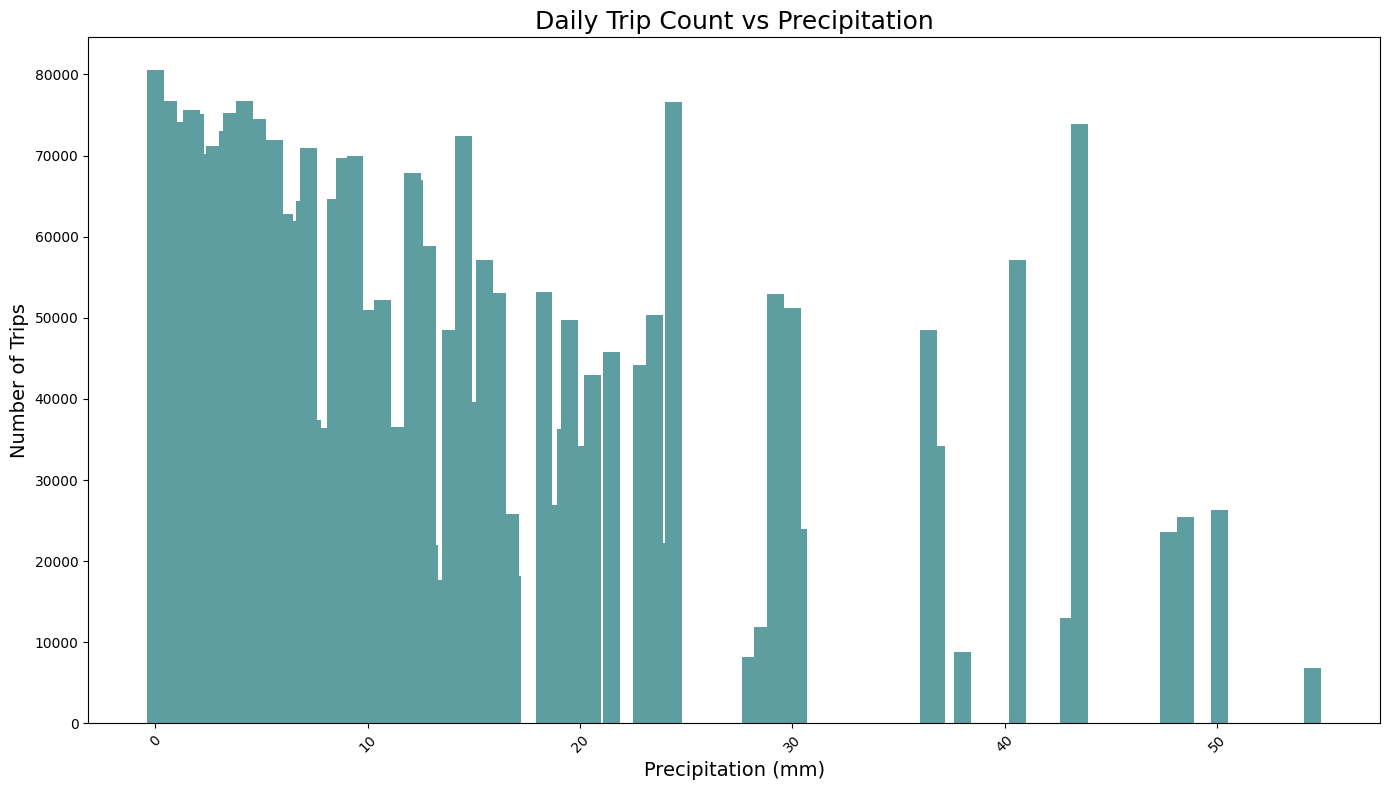

In [ ]:
# Analyzing how precipitation impact overall ridership

# Define the positions for the bars
plt.figure(figsize=(14, 8))  

# Plotting 
plt.bar(daily_data1['precipitation (mm)'], daily_data1['daily_trip_count'], color='cadetblue')
plt.title('Daily Trip Count vs Precipitation', fontsize=18)
plt.xlabel('Precipitation (mm)', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.tight_layout()  
plt.show()

Here it can be seen that most of the rides happen during low precipitation but it's still unclear if they are correlated

In [ ]:
def categorize_season(month):
    """Categorize the month into meteorological seasons."""
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Categorize into seasons
daily_data1['season'] = daily_data1['date_hour'].dt.month.apply(categorize_season)

# Prepare data for ANOVA
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
seasonal_data = [daily_data1[daily_data1['season'] == season]['daily_trip_count'] for season in seasons]

# Perform ANOVA
anova_result = f_oneway(*seasonal_data)

print("\nANOVA Test Result:\n", anova_result)


ANOVA Test Result:
 F_onewayResult(statistic=97.11662584040945, pvalue=4.2105676137944114e-46)


In [ ]:
# Calculating mean and standard error for each season
seasonal_means = daily_data1.groupby('season')['daily_trip_count'].mean()
seasonal_std = daily_data1.groupby('season')['daily_trip_count'].std()
seasonal_count = daily_data1['season'].value_counts()
seasonal_stderr = seasonal_std / np.sqrt(seasonal_count)
seasonal_means

season
Autumn    55060.791209
Spring    44602.717391
Summer    63438.608696
Winter    28609.000000
Name: daily_trip_count, dtype: float64

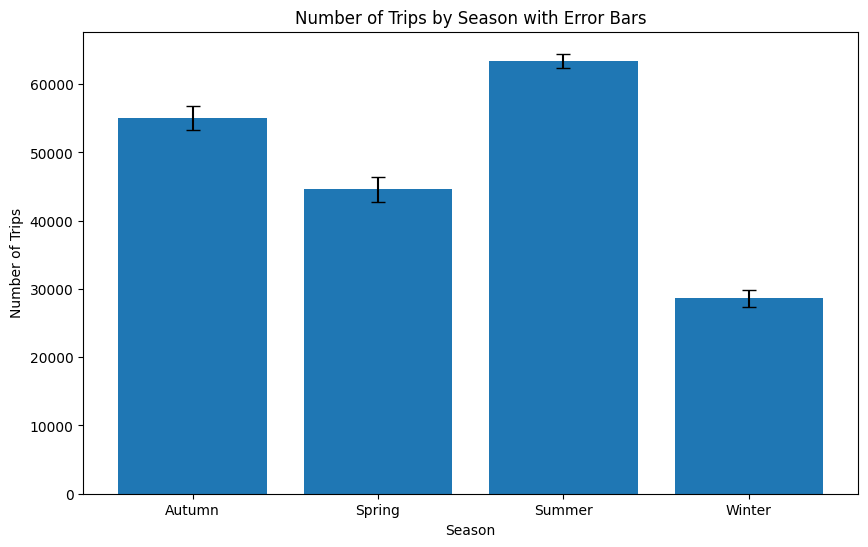

In [ ]:
# Defining the positions for the bars so it matches the seasonal means
seasons1 = ['Autumn', 'Spring', 'Summer', 'Winter']
bar_positions = range(len(seasons1))

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(bar_positions, seasonal_means, yerr=seasonal_stderr, capsize=5)
plt.xticks(bar_positions, seasons1)
plt.title('Number of Trips by Season with Error Bars')
plt.xlabel('Season')
plt.ylabel('Number of Trips')
plt.show()

Based on the ANOVA and bar-plot it can be seen that the change is not just a random occurrence but likely due to the influence of the seasons themselves (such as weather conditions, daylight hours, etc.).

**Let's see if this can be explained by precipitation alone**

In [ ]:
# Calculating the correlation between precipitation and trip count
correlation1 = daily_data1[['precipitation (mm)', 'daily_trip_count']].corr()
correlation1

,precipitation (mm),daily_trip_count
precipitation (mm),1.000000,-0.279428
daily_trip_count,-0.279428,1.000000


There is no clear correlation. Let's check if other weather data have some correlation with the number of trips per day


In [ ]:
extended_weather_data = pd.read_csv('Weather_Extended.csv')
extended_weather_data.head()

,time,temperature_2m (C),precipitation (mm),is_day (),sunshine_duration (s)
0,2018-01-01T00:00,-11.7,0.0,0,0.0
1,2018-01-01T01:00,-11.9,0.0,0,0.0
2,2018-01-01T02:00,-12.3,0.0,0,0.0
3,2018-01-01T03:00,-12.6,0.0,0,0.0
4,2018-01-01T04:00,-12.9,0.0,0,0.0


In [ ]:
# Converting 'time' in extended weather data to datetime
extended_weather_data['time'] = pd.to_datetime(extended_weather_data['time'])

# Merging the datasets based on the nearest hour in starttime
merged_data2 = pd.merge_asof(df.sort_values('date_hour'), extended_weather_data, left_on='date_hour', right_on='time', direction='nearest')

merged_data2.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,date_hour,time,temperature_2m (C),precipitation (mm),is_day (),sunshine_duration (s)
0,650781,800,2018-01-01 00:45:03.011,2018-01-01 00:58:23.761,3431.0,40.746524,-73.977885,446.0,40.744876,-73.995299,31509,Subscriber,1986,1,2018-01-01,2018-01-01,-11.7,0.0,0,0.0
1,192744,613,2018-01-01 00:03:15.116,2018-01-01 00:13:28.480,386.0,40.714948,-74.002345,2008.0,40.705693,-74.016777,21678,Subscriber,1982,1,2018-01-01,2018-01-01,-11.7,0.0,0,0.0
2,192745,1080,2018-01-01 00:47:21.298,2018-01-01 01:05:22.149,386.0,40.714948,-74.002345,265.0,40.722293,-73.991475,33016,Subscriber,1954,2,2018-01-01,2018-01-01,-11.7,0.0,0,0.0
3,262500,364,2018-01-01 00:27:19.197,2018-01-01 00:33:24.147,447.0,40.763707,-73.985162,508.0,40.763414,-73.996674,16976,Subscriber,1990,1,2018-01-01,2018-01-01,-11.7,0.0,0,0.0
4,448924,1311,2018-01-01 00:25:01.823,2018-01-01 00:46:52.968,2003.0,40.733812,-73.980544,536.0,40.741444,-73.975361,20996,Subscriber,1987,2,2018-01-01,2018-01-01,-11.7,0.0,0,0.0


In [ ]:
merged_data2['date_hour'] = pd.to_datetime(merged_data2['date_hour'])

# Resampling to get daily trip count
daily_data = merged_data2.resample('D', on='date_hour').size().reset_index(name='daily_trip_count')

# Setting the 'date' column as the index and ensuring it's a datetime index 
daily_data.set_index(pd.DatetimeIndex(daily_data['date_hour']), inplace=True)

In [ ]:
# Converting the 'time' column to datetime and set as index
if 'time' in extended_weather_data.columns:
    extended_weather_data['time'] = pd.to_datetime(extended_weather_data['time'])
    extended_weather_data.set_index('time', inplace=True)

# Resampling and aggregating the weather data
daily_weather = extended_weather_data.resample('D').agg({
    'temperature_2m (C)': 'mean',  
    'is_day ()': 'mean',            
    'precipitation (mm)': 'sum',    
    'sunshine_duration (s)': 'sum'  
})

# Merging the weather data with daily trip data
daily_data.set_index(pd.to_datetime(daily_data['date_hour']).dt.date, inplace=True)
daily_data = daily_data.merge(daily_weather, left_index=True, right_index=True, how='left')

# Now 'daily_data' will have both trip count and weather data


In [ ]:
daily_data.head()

,date_hour,daily_trip_count,temperature_2m (C),is_day (),precipitation (mm),sunshine_duration (s)
date_hour,,,,,,
2018-01-01,2018-01-01,5494,-11.404167,0.375,0.0,29142.94
2018-01-02,2018-01-02,18804,-8.304167,0.375,0.0,29155.92
2018-01-03,2018-01-03,24270,-7.320833,0.375,0.0,29267.53
2018-01-04,2018-01-04,1921,-4.933333,0.375,20.0,0.00
2018-01-05,2018-01-05,4971,-11.008333,0.375,0.1,29444.99


In [ ]:
relevant_columns = [
    'daily_trip_count',
    'temperature_2m (C)',
    'precipitation (mm)',
    'is_day ()',
    'sunshine_duration (s)',
    
]

In [ ]:
correlation_matrix_relevant = daily_data[relevant_columns].corr()
correlation_matrix_relevant


,daily_trip_count,temperature_2m (C),precipitation (mm),is_day (),sunshine_duration (s)
daily_trip_count,1.000000,0.769017,-0.279428,0.579945,0.517449
temperature_2m (C),0.769017,1.000000,0.078043,0.746637,0.282861
precipitation (mm),-0.279428,0.078043,1.000000,-0.008875,-0.427287
is_day (),0.579945,0.746637,-0.008875,1.000000,0.352010
sunshine_duration (s),0.517449,0.282861,-0.427287,0.352010,1.000000


It's seen that some of the data has strong correlation with the trip count. Maybe if all are combined (i.e. seasonality and all weather conditions) a better model can be made to forecast the data.

## Time Series Model
The SARIMA model is chosen because the the time series exhibits seasonal patterns which the normal ARIMA model can't include for.

Here there are several different parameters that need to be determined. This includes the Moving Average component (p), the Autoregression (q) and the integrated compopont (d).

Source: https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

In [ ]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

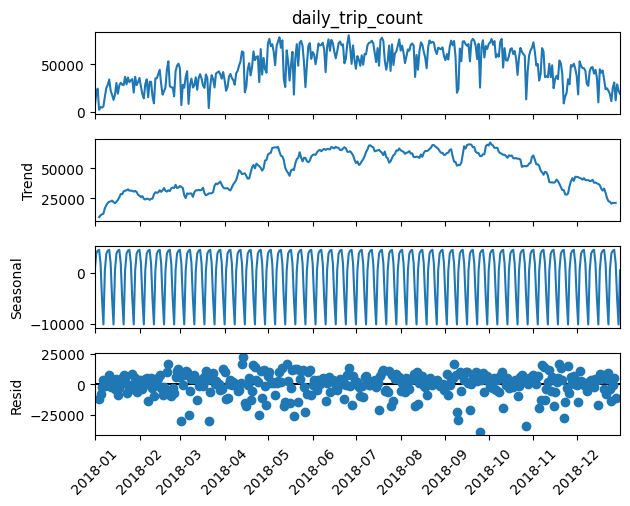

In [ ]:
decomposition = seasonal_decompose(daily_data['daily_trip_count'], model='additive')
decomposition.plot()
plt.xticks(rotation=45)
plt.show()

ADF Statistic: -1.533482
p-value: 0.516888


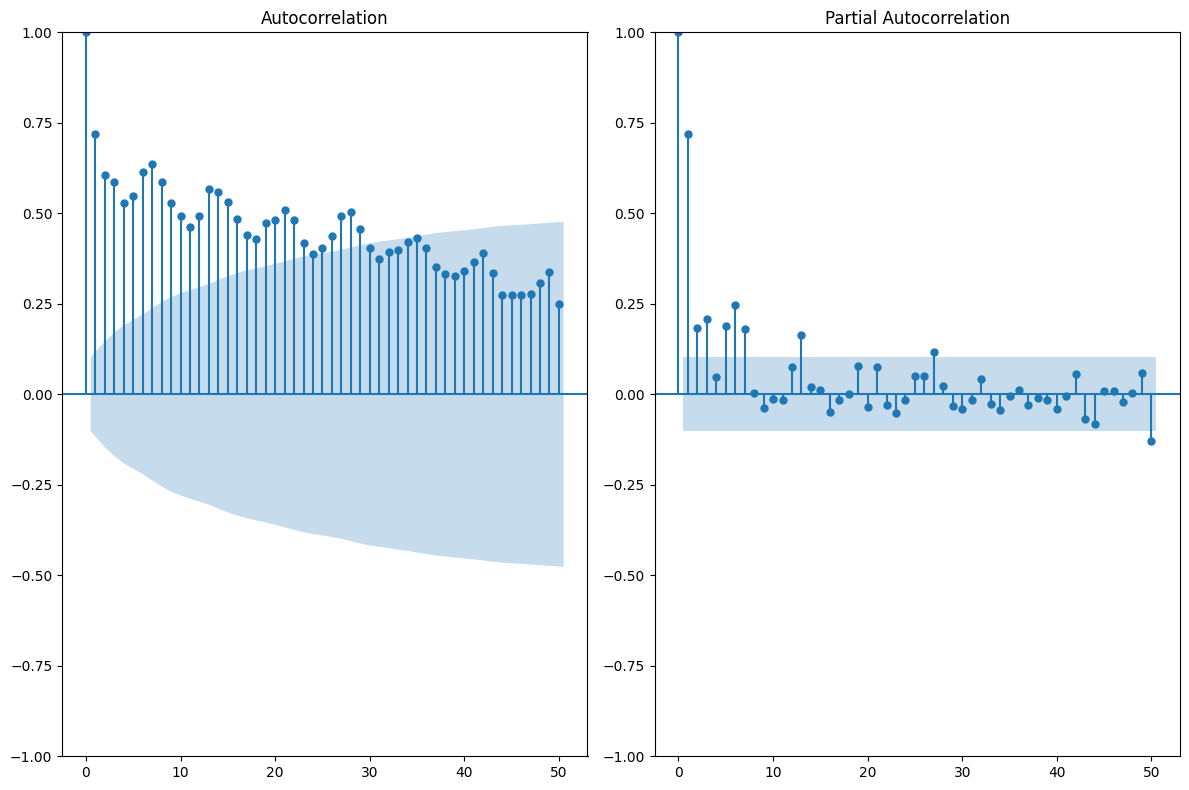

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller can implie if the time series is stationary and if it may require differencing (d)
adf_test = adfuller(daily_data['daily_trip_count'])
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])


fig, axes = plt.subplots(1, 2, figsize=(12, 8))


# Plot ACF: This will help to identify the parameter q (MA component)
plot_acf(daily_data['daily_trip_count'], lags=50, ax=axes[0])  

# Plot PACF: This will help to identify the parameter p (AR component)
plot_pacf(daily_data['daily_trip_count'], lags=50, ax=axes[1])  
plt.tight_layout()
plt.show()

For the ADF, it indicates that there might be need for differencing but this will later be determined though and iterative process. So we start by setting d=1

The q can't be determined by the ACF since it cuts off after many lags, so we start by setting q=1

The p is dificult to determine is there is no clear cuts offs of lag. So, start by p=1

**Now it's all done on seasonality, to determine the parameters**

ADF Statistic: -4.428120222139319
p-value: 0.00026460476831964856


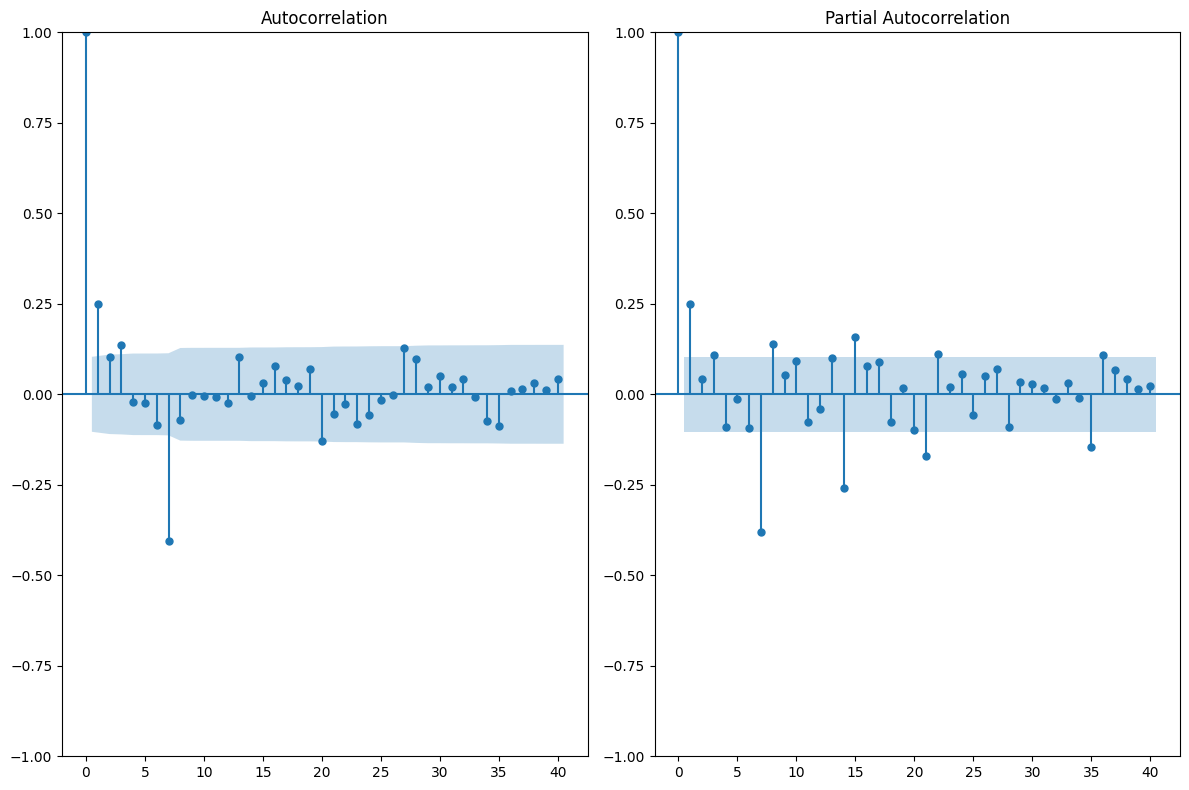

In [ ]:
daily_data['seasonally_differenced'] = daily_data['daily_trip_count'].diff(7)

# Drops any NaNs created by differencing
daily_data.dropna(inplace=True)
daily_data.index.freq = 'D'

# Performs Augmented Dickey-Fuller (D)
adf_result_seasonal = adfuller(daily_data['seasonally_differenced'])
print('ADF Statistic:', adf_result_seasonal[0])
print('p-value:', adf_result_seasonal[1])

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

# Checks the ACF (Q) and PACF (P) plots 
plot_acf(daily_data['seasonally_differenced'].dropna(), lags=40,ax=axes[0])
plot_pacf(daily_data['seasonally_differenced'].dropna(), lags=40,ax=axes[1])
plt.tight_layout()
plt.show()

For the ADF, it indicates that there is no need for differencing, so D=0

For P and Q, it's hard to determine so they start by taking the value 1.

**Below is the time series model used for forecasting**
Source: https://s3.amazonaws.com/tripdata/index.html

In [ ]:
# Loading the future weather data
future_weather_data = pd.read_csv('Future_Weather_2019.csv')

# Initializing the data
future_weather_data['time'] = pd.to_datetime(future_weather_data['time'])
future_weather_data.set_index('time', inplace=True)


# Resampling the data to daily frequency if necessary, and aggregating the same way as your historical data
future_exog = future_weather_data.resample('D').agg({
    'temperature_2m (C)': 'mean',
    'precipitation (mm)': 'sum',
    'is_day ()': 'mean',
    'sunshine_duration (s)': 'sum'
})
future_exog.head()

,temperature_2m (C),precipitation (mm),is_day (),sunshine_duration (s)
time,,,,
2019-01-01,10.008333,21.5,0.375,16687.36
2019-01-02,2.483333,0.0,0.375,18708.15
2019-01-03,4.733333,0.0,0.375,21817.70
2019-01-04,2.225000,0.0,0.375,24447.59
2019-01-05,5.162500,20.0,0.375,0.00


In [ ]:
# Fit a time series model (SARIMA)
p=1
d=0
q=1
P=1
D=0
Q=1
s=7

model = SARIMAX(daily_data['daily_trip_count'],
                order=(p, d, q), #Trip count
                seasonal_order=(P, D, Q, s), #Seasonal
                exog=daily_data[['temperature_2m (C)', 'precipitation (mm)', 'is_day ()','sunshine_duration (s)']])  #External regressors

            
model_2 = SARIMAX(daily_data['daily_trip_count'],
                order=(p, d, q),
                seasonal_order=(0, 0, 0, 0))

model_3 = SARIMAX(daily_data['daily_trip_count'],
                order=(p, d, q),
                seasonal_order=(0, 0, 0, 0),
                exog=daily_data[['temperature_2m (C)', 'precipitation (mm)', 'is_day ()','sunshine_duration (s)']])

model_4 = SARIMAX(daily_data['daily_trip_count'],
                order=(p, d, q),
                seasonal_order=(P, D, Q, s))



results = model.fit()
results_2 = model_2.fit()
results_3 = model_3.fit()
results_4 = model_4.fit()

# Forecast
number_of_steps = 31  # To get the results for Jan-19
future_exog = future_exog.iloc[:number_of_steps, :]

forecast = results.get_forecast(steps=number_of_steps, exog=future_exog)
forecast_2 = results_2.get_forecast(steps=number_of_steps)
forecast_3 = results_3.get_forecast(steps=number_of_steps, exog=future_exog)
forecast_4 = results_4.get_forecast(steps=number_of_steps)

c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


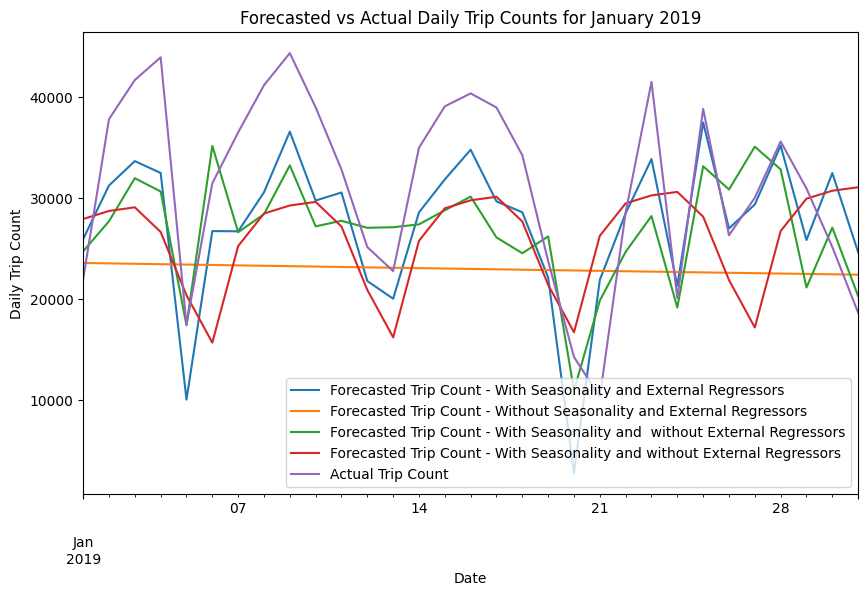

In [ ]:
# Loading the actual trip data
actual_trip_data = pd.read_csv('201901-citibike-tripdata.csv')

# Initializing the data
actual_trip_data['starttime'] = pd.to_datetime(actual_trip_data['starttime'])
actual_trip_data.set_index('starttime', inplace=True)
actual_daily_trip_count = actual_trip_data.resample('D').size()

# Plot the forecasted trip count
forecast.predicted_mean.plot(label='Forecasted Trip Count - With Seasonality and External Regressors')
forecast_2.predicted_mean.plot(label='Forecasted Trip Count - Without Seasonality and External Regressors')
forecast_3.predicted_mean.plot(label='Forecasted Trip Count - With Seasonality and  without External Regressors')
forecast_4.predicted_mean.plot(label='Forecasted Trip Count - With Seasonality and without External Regressors')

# Overlaying the actual trip count
actual_daily_trip_count.plot(label='Actual Trip Count', figsize=(10, 6))

# Plot text
plt.xlabel('Date')
plt.ylabel('Daily Trip Count')
plt.title('Forecasted vs Actual Daily Trip Counts for January 2019')
plt.legend()

plt.show()

It's seen that there are clear differences in the predicted data

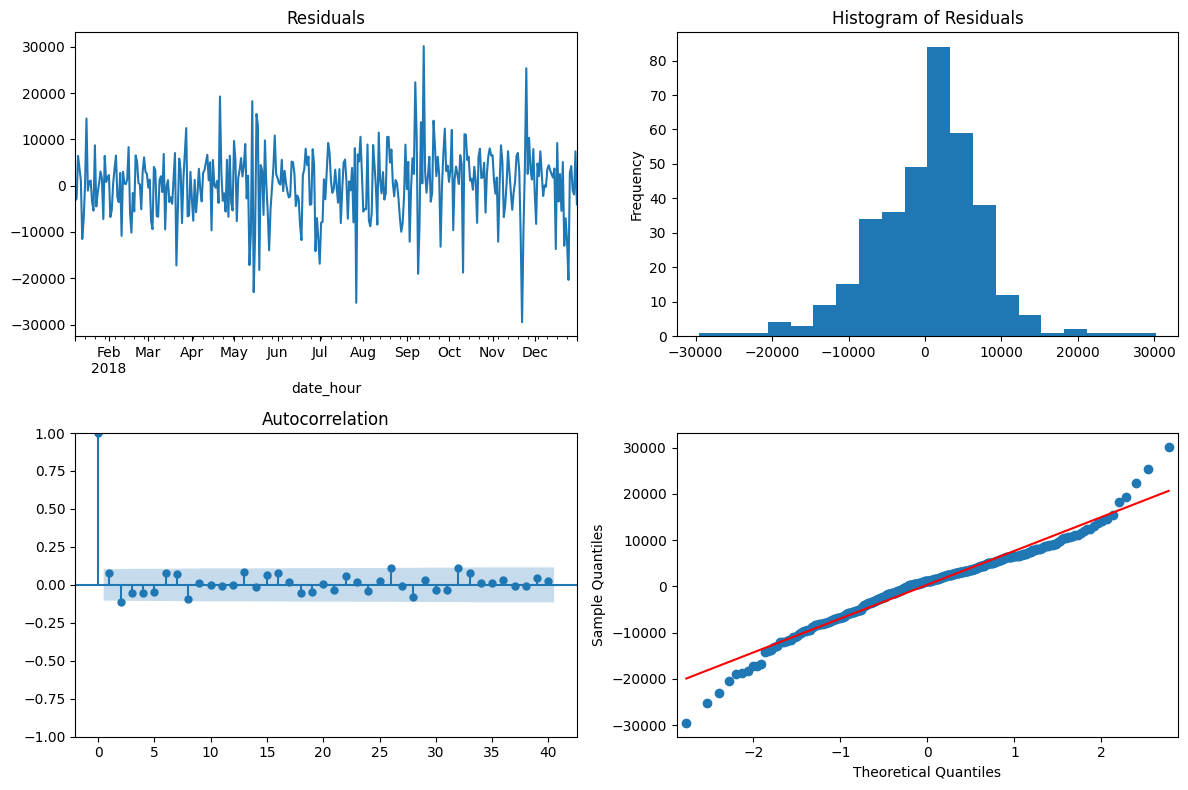

In [ ]:
residuals = results.resid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

import statsmodels.api as sm

# Plot of the residuals of the graphs
residuals.plot(ax=axes[0, 0], title='Residuals')
residuals.plot(kind='hist', bins=20, ax=axes[0, 1], title='Histogram of Residuals')
plot_acf(residuals, lags=40, ax=axes[1, 0])
sm.qqplot(residuals, line='s', ax=axes[1, 1])

plt.tight_layout()
plt.show()


Now the results from the forecasting using both seasonality and external regressors

In [ ]:
results.summary() #result including all parameters

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                  daily_trip_count   No. Observations:                  358
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 7)   Log Likelihood               -3705.357
Date:                           Mon, 04 Dec 2023   AIC                           7428.714
Time:                                   21:55:58   BIC                           7463.638
Sample:                               01-08-2018   HQIC                          7442.603
                                    - 12-31-2018                                         
Covariance Type:                             opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
temperature_2m (C)     1070.7118    142.819      7.497      0.000     790.792    1350.632
precipitation (mm)     -501.0429     43.076    -11.632      0.000    -585.470    -416.616
is_day ()              5.609e+04   2.33e+04      2.405      0.016    1.04e+04    1.02e+05
sunshine_duration (s)     0.3122      0.037      8.437      0.000       0.240       0.385
ar.L1                     0.9145      0.048     19.166      0.000       0.821       1.008
ma.L1                    -0.5623      0.077     -7.329      0.000      -0.713      -0.412
ar.S.L7                   0.9965      0.006    156.520      0.000       0.984       1.009
ma.S.L7                  -0.9496      0.048    -19.943      0.000      -1.043      -0.856
sigma2                 7.413e+07     21.930   3.38e+06      0.000    7.41e+07    7.41e+07
===================================================================================
Ljung-Box (L1) (Q):                   2.40   Jarque-Bera (JB):                71.93
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               2.32   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.55e+21. Standard errors may be unstable.
"""

**Though an iterative process mainly looking at AIC and BIC with the goal of lowering them as much as possible as well as looking to the residuals to change parameters in the SARIMA model. The chosen parameters in the current model shows the best fit without overfitting to the data and still showing significance.**
"

There might still be need for future improvements but for now it looks good. This can clearly be seen in the QQ-plot and the skewness of the data

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_with_exog_sea = mean_absolute_error(actual_trip_data.resample('D').size(), forecast.predicted_mean)
mse_with_exog_sea = mean_squared_error(actual_trip_data.resample('D').size(), forecast.predicted_mean)
rmse_with_exog_sea = np.sqrt(mse_with_exog_sea)

mae_without_exog_sea = mean_absolute_error(actual_trip_data.resample('D').size(), forecast_2.predicted_mean)
mse_without_exog_sea = mean_squared_error(actual_trip_data.resample('D').size(), forecast_2.predicted_mean)
rmse_without_exog_sea = np.sqrt(mse_without_exog_sea)

mae_with_exog_without_sea = mean_absolute_error(actual_trip_data.resample('D').size(), forecast_3.predicted_mean)
mse_with_exog_without_sea = mean_squared_error(actual_trip_data.resample('D').size(), forecast_3.predicted_mean)
rmse_with_exog_without_sea = np.sqrt(mse_with_exog_without_sea)

mae_without_exog_with_sea = mean_absolute_error(actual_trip_data.resample('D').size(), forecast_4.predicted_mean)
mse_without_exog_with_sea = mean_squared_error(actual_trip_data.resample('D').size(), forecast_4.predicted_mean)
rmse_without_exog_with_sea = np.sqrt(mse_without_exog_with_sea)

# Output the results for comparison
results_comparison = {
    'MAE with External Regressors and seasonality': mae_with_exog_sea,
    'RMSE with External Regressors and seasonality': rmse_with_exog_sea,
    'MAE without External Regressors and seasonality': mae_without_exog_sea,
    'RMSE without External Regressors and seasonality': rmse_without_exog_sea,
    'MAE with External Regressors and without seasonality': mae_with_exog_without_sea,
    'RMSE with External Regressors and without seasonality': rmse_with_exog_without_sea,
    'MAE without External Regressors and with seasonality': mae_without_exog_with_sea,
    'RMSE without External Regressors and with seasonality': rmse_without_exog_with_sea
}

results_comparison


{'MAE with External Regressors and seasonality': 5717.758603718276,
 'RMSE with External Regressors and seasonality': 6720.189962432034,
 'MAE without External Regressors and seasonality': 10507.715166584649,
 'RMSE without External Regressors and seasonality': 12245.687350370074,
 'MAE with External Regressors and without seasonality': 6837.616178696103,
 'RMSE with External Regressors and without seasonality': 7997.179238696283,
 'MAE without External Regressors and with seasonality': 8807.006285756339,
 'RMSE without External Regressors and with seasonality': 9865.804823380575}

### Key Insights
1. **Model with Seasonality and External Regressors**: Incorporating both seasonality and external factors like temperature, precipitation, daylight, and sunshine duration leads to the lowest MAE and RMSE, highlighting their importance in enhancing predictive accuracy.

2. **Impact of External Regressors**: External factors significantly improve model accuracy, evidenced by lower MAE and RMSE, demonstrating that these variables are critical predictors for daily trip counts. This is also seen by the P-values. 

3. **Influence of Seasonality**: While seasonality alone improves forecast accuracy, its effectiveness is notably enhanced when combined with external regressors.


### Limitations and Future Work
1. **Overfitting to Seasonality**:
   - The model might be overfitting to seasonal patterns, suggested by near-unity coefficients for seasonal AR terms. 
   
2. **Residual Diagnostics**:
   - The ACF plot shows patterns in residuals, and their distribution isn't normal (per histogram and Q-Q plot), hinting at model inadequacies. Data transformation or non-linear modeling might resolve this.

3. **Statistical Significance**:
   - All external regressors are statistically significant with tight confidence intervals, emphasizing their contribution to the model.
4. **Model Changes**:
   - Presence of heteroskedasticity suggests the need for more complex models like GARCH or variance-stabilizing transformations.
   - Implement additional out-of-sample testing or cross-validation to confirm model robustness and prevent overfitting.

# PART 3 - Exploration using nearby station

**Question**
Do nearby railway stations close to the highest demand cluster effect the usage of bikes. <br>

#### The inital assumption would be 2 things
1. Closer the bike stations are to the rail station more people will be using it (dropoffs/pickups)
2. The farther they are more people might use bikes to commute to the rail staions <br>

#### Both the above mentioned things can be answered using a heatmap of sorts. <br>
The idea would be to make a monthly count for pickups and drops and then make a heatmap for each month

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import copy
from shapely.geometry import box
import folium
from folium.plugins import HeatMap

In [ ]:
df = pd.read_csv('Trips_2018.csv')

In [ ]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime']) 
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [ ]:
a = df[df.duplicated(subset=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], keep=False)]
if a.empty:
    print("No duplicates found.")
else:
    print("Duplicate rows:")
    print(a)

df_dupli_removed = df.drop_duplicates(subset=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'])
df_dupli_removed

Duplicate rows:
          Unnamed: 0  tripduration               starttime  \
0                  0           970 2018-01-01 13:50:57.434   
1                  1           723 2018-01-01 15:33:30.182   
2                  2           496 2018-01-01 15:39:18.337   
3                  3           306 2018-01-01 15:40:13.372   
4                  4           306 2018-01-01 18:14:51.568   
...              ...           ...                     ...   
17548334    17548334           734 2018-12-31 23:55:06.991   
17548335    17548335          2551 2018-12-31 23:55:44.307   
17548336    17548336          2376 2018-12-31 23:56:52.850   
17548337    17548337          2758 2018-12-31 23:58:29.212   
17548338    17548338          2459 2018-12-31 23:59:51.085   

                        stoptime  start_station_id  start_station_latitude  \
0        2018-01-01 14:07:08.186              72.0               40.767272   
1        2018-01-01 15:45:33.341              72.0               40.767272   
2    

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548062,17548062,1306,2018-12-31 20:52:14.611,2018-12-31 21:14:01.559,421.0,40.695734,-73.971297,386.0,40.714948,-74.002345,33933,Subscriber,1973,1
17548094,17548094,794,2018-12-31 21:09:49.751,2018-12-31 21:23:04.525,216.0,40.700379,-73.995481,350.0,40.715595,-73.987030,35727,Subscriber,1983,1
17548129,17548129,2892,2018-12-31 21:30:58.182,2018-12-31 22:19:10.771,3342.0,40.677775,-74.009461,3155.0,40.764400,-73.966490,34680,Subscriber,1976,2
17548258,17548258,934,2018-12-31 22:49:23.000,2018-12-31 23:04:57.315,3714.0,40.706842,-73.954435,436.0,40.682166,-73.953990,35706,Subscriber,1989,1


In [ ]:
df_for_cluster_start = df.drop_duplicates(subset=['start_station_id'])  
df_for_cluster_end = df.drop_duplicates(subset=['end_station_id'])  
print(df_for_cluster_start.shape)
print(df_for_cluster_end.shape)

(819, 14)
(851, 14)


In [ ]:
start_stations = df_for_cluster_start['start_station_id'].unique()
end_stations = df_for_cluster_end['end_station_id'].unique()
print(start_stations)
print(end_stations)
unique_values = np.union1d(start_stations, end_stations)
print(len(unique_values))
missing_values_array2 = np.setdiff1d(start_stations, end_stations)
print(missing_values_array2)

[  72.   79.   82.   83.  119.  120.  127.  128.  143.  144.  146.  150.
  151.  152.  157.  161.  164.  167.  168.  173.  174.  195.  212.  216.
  217.  223.  228.  229.  232.  236.  237.  238.  239.  241.  242.  243.
  244.  245.  247.  248.  249.  251.  252.  253.  254.  257.  258.  259.
  260.  261.  262.  264.  265.  266.  267.  268.  270.  274.  275.  276.
  278.  279.  280.  281.  282.  284.  285.  289.  291.  293.  295.  296.
  297.  301.  302.  303.  304.  305.  306.  307.  308.  309.  310.  311.
  312.  313.  314.  315.  316.  317.  319.  320.  321.  322.  323.  324.
  325.  326.  327.  328.  330.  331.  332.  334.  335.  336.  337.  339.
  340.  341.  342.  343.  344.  345.  346.  347.  349.  350.  351.  353.
  354.  355.  356.  357.  358.  359.  360.  361.  362.  363.  364.  365.
  366.  368.  369.  372.  373.  376.  377.  379.  380.  382.  383.  385.
  386.  387.  388.  389.  390.  391.  392.  393.  394.  396.  397.  398.
  399.  400.  401.  402.  403.  405.  406.  407.  4

In [ ]:
def detect_outliers(data,feature):
    Q1=data[feature].quantile(0.25)
    Q3=data[feature].quantile(0.75)
    IQR=Q3-Q1
    outlier_threshold_low=Q1-1.5*IQR
    outlier_threshold_high=Q3+1.5*IQR
    outliers=(data[feature]<outlier_threshold_low)|(data[feature]>outlier_threshold_high)
    return outliers

outliers_trip_minutes=detect_outliers(df,'tripduration')
outliers_start_lat=detect_outliers(df,'start_station_latitude')
outliers_start_long=detect_outliers(df,'start_station_longitude')
outliers_end_lat=detect_outliers(df,'end_station_latitude')
outliers_end_long=detect_outliers(df,'end_station_longitude')

print(outliers_trip_minutes.sum())
print(outliers_start_lat.sum())
print(outliers_start_long.sum())
print(outliers_end_lat.sum())
print(outliers_end_long.sum())

all_outliers=outliers_trip_minutes|outliers_start_lat|outliers_start_long|outliers_end_lat|outliers_end_long
dfc=df[~all_outliers]

count_true = all_outliers.sum()
print(count_true)

824642
13027
389964
15108
396067
1351874


In [ ]:
dfc

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548330,17548330,312,2018-12-31 23:49:43.952,2018-12-31 23:54:56.251,3166.0,40.780578,-73.985624,3164.0,40.777057,-73.978985,27419,Subscriber,1960,1
17548331,17548331,165,2018-12-31 23:50:34.607,2018-12-31 23:53:20.583,498.0,40.748549,-73.988084,472.0,40.745712,-73.981948,20190,Subscriber,1994,2
17548332,17548332,1027,2018-12-31 23:51:13.922,2019-01-01 00:08:21.790,423.0,40.765849,-73.986905,285.0,40.734546,-73.990741,28510,Subscriber,1981,1
17548333,17548333,174,2018-12-31 23:53:59.072,2018-12-31 23:56:53.475,260.0,40.703652,-74.011678,260.0,40.703652,-74.011678,33887,Subscriber,1980,1


In [ ]:
geometry = [Point(lon, lat) for lon, lat in zip(df_for_cluster_end['end_station_longitude'], df_for_cluster_end['end_station_latitude'])]
gdf = gpd.GeoDataFrame(df_for_cluster_end, geometry=geometry, crs='EPSG:4326')  # 'EPSG:4326' is the coordinate reference system (CRS) for lat/lon

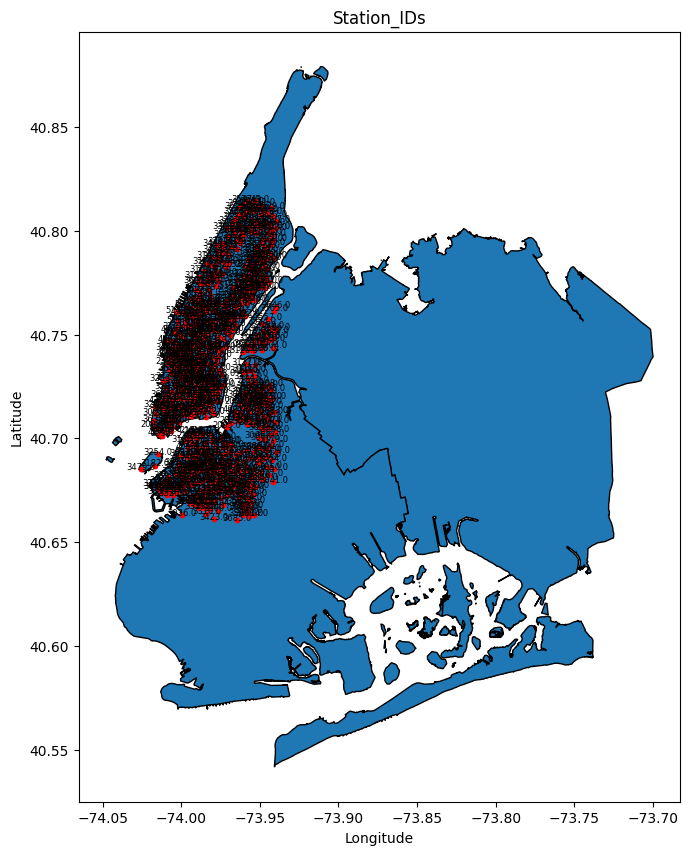

In [ ]:
shapefile_p = 'bobo/geo_export_d99d1bf6-4805-4c39-9626-98befb32f3da.shp'
ny = gpd.read_file(shapefile_p)

required_boro = [4.0, 1.0, 3.0] 
useful_ny = ny[ny['boro_code'].isin(required_boro)]
useful_ny

ax = useful_ny.plot(figsize=(10, 10), edgecolor='black')  #change later to show bigger image
gdf.plot(ax=ax, color='red', markersize=10)
for idx, row in gdf.iterrows():
    ax.annotate(text=row['end_station_id'], xy=(row['geometry'].x, row['geometry'].y), ha='center', fontsize=6)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Station_IDs')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

points_array = gdf['geometry'].apply(lambda point: [point.x, point.y]).to_list()
points_np_array = np.array(points_array)
k = 25
kmeans = KMeans(n_clusters=k, random_state=5)
kmeans.fit(points_np_array)
gdf['cluster_labels'] = kmeans.labels_


c:\Users\adop\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


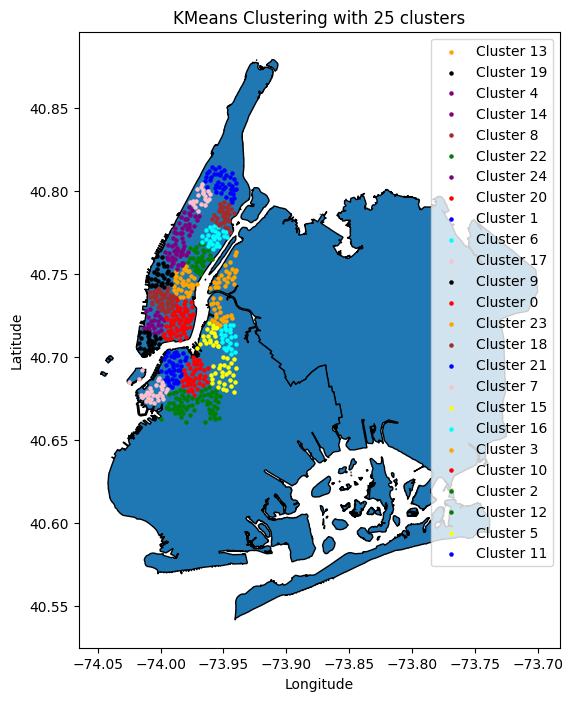

In [ ]:
shapefile_p = 'bobo/geo_export_d99d1bf6-4805-4c39-9626-98befb32f3da.shp'
ny = gpd.read_file(shapefile_p)

required_boro = [4.0, 1.0, 3.0] 
useful_ny = ny[ny['boro_code'].isin(required_boro)]
useful_ny

colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'cyan', 'pink', 'brown', 'black']
cluster_colors = {label: colors[label % len(colors)] for label in gdf['cluster_labels'].unique()}

# Plot the shapefile as the base map
fig, ax = plt.subplots(figsize=(10, 8))
useful_ny.plot(ax=ax, edgecolor='black')

# Plot clusters with assigned colors
for label, color in cluster_colors.items():
    cluster_points = gdf[gdf['cluster_labels'] == label]
    cluster_points.plot(ax=ax, color=color, markersize=5, label=f'Cluster {label}')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title(f'KMeans Clustering with {k} clusters')

# Show the plot with legend
plt.legend()
plt.show()

In [ ]:
# Grouped the GeoDataFrame by 'cluster_labels' and count the number of stations in each cluster
cluster_station_counts = gdf.groupby('cluster_labels')['end_station_id'].count()

# Find the cluster label with the highest number of stations
max_stations_cluster = cluster_station_counts.idxmax()
max_station_count = cluster_station_counts[max_stations_cluster]

print(f"Cluster label with the highest number of stations: {max_stations_cluster}")
print(f"Number of stations in this cluster: {max_station_count}")
gdf

Cluster label with the highest number of stations: 8
Number of stations in this cluster: 42


,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,geometry,cluster_labels
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1,POINT (-73.98848 40.74901),13
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1,POINT (-73.99468 40.75059),19
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1,POINT (-74.00212 40.75594),19
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1,POINT (-73.98516 40.76371),4
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1,POINT (-73.98471 40.77467),14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15675552,15675552,268,2018-11-08 13:57:25.144,2018-11-08 14:01:53.760,3067.0,40.701666,-73.943730,3714.0,40.706842,-73.954435,34968,Subscriber,1980,1,POINT (-73.95444 40.70684),15
15890014,15890014,217,2018-11-13 17:15:39.172,2018-11-13 17:19:16.646,3449.0,40.721463,-73.948009,3715.0,40.718170,-73.955201,30821,Subscriber,1984,1,POINT (-73.95520 40.71817),15
16704227,16704227,590,2018-12-05 10:29:52.952,2018-12-05 10:39:43.162,285.0,40.734546,-73.990741,3718.0,40.727464,-73.979504,33078,Subscriber,1962,1,POINT (-73.97950 40.72746),20
16813724,16813724,526,2018-12-07 17:45:47.865,2018-12-07 17:54:33.971,420.0,40.687645,-73.969689,3719.0,40.683223,-73.973812,32823,Subscriber,1989,2,POINT (-73.97381 40.68322),10


In [ ]:
# Find the cluster label with the highest number of stations
largest_cluster_label = gdf['cluster_labels'].value_counts().idxmax()
# Filter the GeoDataFrame for the largest cluster
largest_cluster_df = gdf[gdf['cluster_labels'] == largest_cluster_label]
# Extract end_station_id values for stations in the largest cluster
end_station_ids_in_largest_cluster = largest_cluster_df['end_station_id'].tolist()
print("Station IDs in the largest cluster:")
print(end_station_ids_in_largest_cluster)
print(len(end_station_ids_in_largest_cluster))

Station IDs in the largest cluster:
[482.0, 127.0, 383.0, 358.0, 380.0, 382.0, 3224.0, 368.0, 435.0, 284.0, 336.0, 405.0, 3263.0, 161.0, 496.0, 345.0, 253.0, 3244.0, 223.0, 247.0, 238.0, 369.0, 293.0, 483.0, 285.0, 335.0, 357.0, 346.0, 229.0, 168.0, 252.0, 254.0, 3260.0, 280.0, 497.0, 3463.0, 3660.0, 3428.0, 3684.0, 3686.0, 3705.0, 3709.0]
42


In [ ]:
largest_cluster_label = gdf['cluster_labels'].value_counts().idxmax()
largest_cluster_df = gdf[gdf['cluster_labels'] == largest_cluster_label]
#cluster 1 dataframe 
cluster_1_drop = dfc[dfc['end_station_id'].isin(end_station_ids_in_largest_cluster)]
cluster_1_pickups = dfc[dfc['start_station_id'].isin(end_station_ids_in_largest_cluster)]
dfc

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17548330,17548330,312,2018-12-31 23:49:43.952,2018-12-31 23:54:56.251,3166.0,40.780578,-73.985624,3164.0,40.777057,-73.978985,27419,Subscriber,1960,1
17548331,17548331,165,2018-12-31 23:50:34.607,2018-12-31 23:53:20.583,498.0,40.748549,-73.988084,472.0,40.745712,-73.981948,20190,Subscriber,1994,2
17548332,17548332,1027,2018-12-31 23:51:13.922,2019-01-01 00:08:21.790,423.0,40.765849,-73.986905,285.0,40.734546,-73.990741,28510,Subscriber,1981,1
17548333,17548333,174,2018-12-31 23:53:59.072,2018-12-31 23:56:53.475,260.0,40.703652,-74.011678,260.0,40.703652,-74.011678,33887,Subscriber,1980,1


In [ ]:
cluster_1_drop_op = copy.deepcopy(cluster_1_drop)
cluster_1_pickups_op = copy.deepcopy(cluster_1_pickups)

In [ ]:
cluster_1_pickups_IDs = cluster_1_pickups_op.groupby('start_station_id')[['start_station_latitude','start_station_longitude']].agg(list).reset_index()
cluster_1_drop_IDs = cluster_1_drop_op.groupby('end_station_id')[['end_station_latitude','end_station_longitude']].agg(list).reset_index()
cluster_1_pickups_IDs['start_station_latitude']=cluster_1_pickups_IDs['start_station_latitude'].str[0]
cluster_1_pickups_IDs['start_station_longitude']=cluster_1_pickups_IDs['start_station_longitude'].str[0]
cluster_1_drop_IDs['end_station_latitude']=cluster_1_drop_IDs['end_station_latitude'].str[0]
cluster_1_drop_IDs['end_station_longitude']=cluster_1_drop_IDs['end_station_longitude'].str[0]
#print(cluster_1_drop_IDs)
#print(cluster_1_pickups_IDs)

In [ ]:
cluster_1_drop_op.drop('Unnamed: 0', axis=1, inplace=True)
cluster_1_drop_op.drop('usertype', axis=1, inplace=True)
cluster_1_drop_op.drop('gender', axis=1, inplace=True)
cluster_1_pickups_op.drop('Unnamed: 0', axis=1, inplace=True)
cluster_1_pickups_op.drop('usertype', axis=1, inplace=True)
cluster_1_pickups_op.drop('gender', axis=1, inplace=True)
cluster_1_drop_op['tripduration'] = cluster_1_drop_op['tripduration']/float(60)
cluster_1_pickups_op['tripduration'] = cluster_1_pickups_op['tripduration']/float(60)
cluster_1_drop_op['starttime'] = pd.to_datetime(cluster_1_drop_op['starttime'], format="%Y-%m-%d %H:%M:%S")
cluster_1_drop_op['stoptime'] = pd.to_datetime(cluster_1_drop_op['stoptime'], format="%Y-%m-%d %H:%M:%S")
cluster_1_pickups_op['starttime'] = pd.to_datetime(cluster_1_pickups_op['starttime'], format="%Y-%m-%d %H:%M:%S")
cluster_1_pickups_op['stoptime'] = pd.to_datetime(cluster_1_pickups_op['stoptime'], format="%Y-%m-%d %H:%M:%S")
cluster_1_drop_op['starttime'] = cluster_1_drop_op['starttime'].dt.floor('s')
cluster_1_drop_op['stoptime'] = cluster_1_drop_op['stoptime'].dt.floor('s')
cluster_1_pickups_op['starttime'] = cluster_1_pickups_op['starttime'].dt.floor('s')
cluster_1_pickups_op['stoptime'] = cluster_1_pickups_op['stoptime'].dt.floor('s')
cluster_1_pickups_op = cluster_1_pickups_op.dropna(subset=['tripduration'])
cluster_1_drop_op = cluster_1_drop_op.dropna(subset=['tripduration'])
cluster_1_pickups_op.set_index('starttime', inplace=True, drop=False)
cluster_1_drop_op.set_index('stoptime', inplace=True, drop=False)

In [ ]:
pickup_count = cluster_1_pickups_op.resample('M').size()
pickup_count = pickup_count.reset_index()
pickup_count.columns = ['Interval', 'Pickups']
pickup_count

,Interval,Pickups
0,2018-01-31,84464
1,2018-02-28,102469
2,2018-03-31,116654
3,2018-04-30,144131
4,2018-05-31,197644
5,2018-06-30,208930
6,2018-07-31,199429
7,2018-08-31,210365
8,2018-09-30,211786
9,2018-10-31,217299


In [ ]:
drop_count = cluster_1_drop_op.resample('H').size()
drop_count = drop_count.reset_index()
drop_count.columns = ['Interval', 'Dropoffs']
drop_count

,Interval,Dropoffs
0,2018-01-01 00:00:00,5
1,2018-01-01 01:00:00,23
2,2018-01-01 02:00:00,7
3,2018-01-01 03:00:00,12
4,2018-01-01 04:00:00,5
...,...,...
8756,2018-12-31 20:00:00,15
8757,2018-12-31 21:00:00,4
8758,2018-12-31 22:00:00,13
8759,2018-12-31 23:00:00,3


In [ ]:
cluster_1_pickups_op['hourly_interval'] = cluster_1_pickups_op['starttime'].dt.strftime('%Y-%m-%d %H')
grouped_data = cluster_1_pickups_op.groupby(['hourly_interval'])['starttime'].count().reset_index()
grouped_data.rename(columns={'starttime': 'pickup_count'}, inplace=True)
grouped_data

,hourly_interval,pickup_count
0,2018-01-01 00,16
1,2018-01-01 01,23
2,2018-01-01 02,10
3,2018-01-01 03,6
4,2018-01-01 04,3
...,...,...
8708,2018-12-31 19,25
8709,2018-12-31 20,11
8710,2018-12-31 21,5
8711,2018-12-31 22,5


In [ ]:
df_station = pd.read_csv('stations.csv')    
df_station

,Division,Line,Borough,Station Name,Station Latitude,Station Longitude,Daytime Routes,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,entrance_georeference,station_georeference
0,IND,Rockaway,Q,Far Rockaway-Mott Av,40.603995,-73.755405,A,Door,YES,NO,YES,FULL,NaN,Beach 22nd St,Mott Ave,SW,40.604657,-73.754178,POINT (-73.754178 40.604657),POINT (-73.755405 40.603995)
1,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,NW,40.599708,-73.761959,POINT (-73.761959 40.599708),POINT (-73.761353 40.600066)
2,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599427,-73.761807,POINT (-73.761807 40.599427),POINT (-73.761353 40.600066)
3,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,YES,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599670,-73.761596,POINT (-73.761596 40.59967),POINT (-73.761353 40.600066)
4,IND,Rockaway,Q,Beach 36th St,40.595398,-73.768175,A,Stair,YES,NO,YES,FULL,NaN,Beach 36th,Edgemere Ave,NE,40.595445,-73.768313,POINT (-73.768313 40.595445),POINT (-73.768175 40.595398)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,YES,NONE,NaN,4th Ave,93th St,SW,40.617587,-74.030696,POINT (-74.030696 40.617587),POINT (-74.030876 40.616622)
1864,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,YES,FULL,NaN,4th Ave,95th St,SW,40.616021,-74.031383,POINT (-74.031383 40.616021),POINT (-74.030876 40.616622)
1865,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,YES,NONE,NaN,4th Ave,93th St,NE,40.617363,-74.030404,POINT (-74.030404 40.617363),POINT (-74.030876 40.616622)
1866,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,YES,FULL,NaN,5th Ave,95th St,NE,40.615893,-74.030860,POINT (-74.03086 40.615893),POINT (-74.030876 40.616622)


In [ ]:
geometry_bike = gpd.points_from_xy(cluster_1_pickups_op['start_station_longitude'], cluster_1_pickups_op['start_station_latitude'])
geo_bikes_pickup = gpd.GeoDataFrame(cluster_1_pickups_op, geometry=geometry_bike)
geo_bikes_pickup

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,hourly_interval,geometry
starttime,,,,,,,,,,,,,
2018-01-01 01:11:58,19.600000,2018-01-01 01:11:58,2018-01-01 01:31:34,127.0,40.731724,-74.006744,382.0,40.734927,-73.992005,25514,1979,2018-01-01 01,POINT (-74.00674 40.73172)
2018-01-01 01:12:26,30.400000,2018-01-01 01:12:26,2018-01-01 01:42:50,127.0,40.731724,-74.006744,530.0,40.771522,-73.990541,30370,1969,2018-01-01 01,POINT (-74.00674 40.73172)
2018-01-01 09:55:37,10.216667,2018-01-01 09:55:37,2018-01-01 10:05:50,127.0,40.731724,-74.006744,3255.0,40.750585,-73.994685,25036,1966,2018-01-01 09,POINT (-74.00674 40.73172)
2018-01-01 10:27:30,7.716667,2018-01-01 10:27:30,2018-01-01 10:35:13,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,33019,1992,2018-01-01 10,POINT (-74.00674 40.73172)
2018-01-01 10:27:52,7.566667,2018-01-01 10:27:52,2018-01-01 10:35:26,127.0,40.731724,-74.006744,229.0,40.727434,-73.993790,27221,1991,2018-01-01 10,POINT (-74.00674 40.73172)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:25:09,6.550000,2018-12-31 23:25:09,2018-12-31 23:31:43,254.0,40.735324,-73.998004,3711.0,40.729667,-73.980680,25785,1957,2018-12-31 23,POINT (-73.99800 40.73532)
2018-12-31 23:32:07,7.100000,2018-12-31 23:32:07,2018-12-31 23:39:14,368.0,40.730386,-74.002150,146.0,40.716250,-74.009106,34329,1999,2018-12-31 23,POINT (-74.00215 40.73039)
2018-12-31 23:32:26,4.116667,2018-12-31 23:32:26,2018-12-31 23:36:34,383.0,40.735238,-74.000271,3709.0,40.738046,-73.996430,32671,1989,2018-12-31 23,POINT (-74.00027 40.73524)


In [ ]:
geometry_stations = gpd.points_from_xy(df_station['Entrance Longitude'], df_station['Entrance Latitude'])
geo_station = gpd.GeoDataFrame(df_station, geometry=geometry_stations)
geo_station

,Division,Line,Borough,Station Name,Station Latitude,Station Longitude,Daytime Routes,Entrance Type,Entry,Exit Only,...,Staffing,Staff Hours,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,entrance_georeference,station_georeference,geometry
0,IND,Rockaway,Q,Far Rockaway-Mott Av,40.603995,-73.755405,A,Door,YES,NO,...,FULL,NaN,Beach 22nd St,Mott Ave,SW,40.604657,-73.754178,POINT (-73.754178 40.604657),POINT (-73.755405 40.603995),POINT (-73.75418 40.60466)
1,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,...,FULL,NaN,Beach 25th St,Rockaway Frwy,NW,40.599708,-73.761959,POINT (-73.761959 40.599708),POINT (-73.761353 40.600066),POINT (-73.76196 40.59971)
2,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,...,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599427,-73.761807,POINT (-73.761807 40.599427),POINT (-73.761353 40.600066),POINT (-73.76181 40.59943)
3,IND,Rockaway,Q,Beach 25th St,40.600066,-73.761353,A,Stair,YES,NO,...,FULL,NaN,Beach 25th St,Rockaway Frwy,SW,40.599670,-73.761596,POINT (-73.761596 40.59967),POINT (-73.761353 40.600066),POINT (-73.76160 40.59967)
4,IND,Rockaway,Q,Beach 36th St,40.595398,-73.768175,A,Stair,YES,NO,...,FULL,NaN,Beach 36th,Edgemere Ave,NE,40.595445,-73.768313,POINT (-73.768313 40.595445),POINT (-73.768175 40.595398),POINT (-73.76831 40.59544)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,...,NONE,NaN,4th Ave,93th St,SW,40.617587,-74.030696,POINT (-74.030696 40.617587),POINT (-74.030876 40.616622),POINT (-74.03070 40.61759)
1864,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,...,FULL,NaN,4th Ave,95th St,SW,40.616021,-74.031383,POINT (-74.031383 40.616021),POINT (-74.030876 40.616622),POINT (-74.03138 40.61602)
1865,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,...,NONE,NaN,4th Ave,93th St,NE,40.617363,-74.030404,POINT (-74.030404 40.617363),POINT (-74.030876 40.616622),POINT (-74.03040 40.61736)
1866,BMT,4th Av,B,95th St,40.616622,-74.030876,R,Stair,YES,NO,...,FULL,NaN,5th Ave,95th St,NE,40.615893,-74.030860,POINT (-74.03086 40.615893),POINT (-74.030876 40.616622),POINT (-74.03086 40.61589)


<AxesSubplot: >

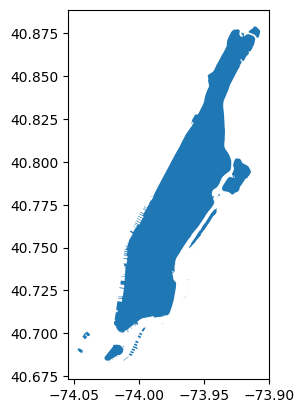

In [ ]:
from shapely.geometry import box

newyork = 'bobo/geo_export_d99d1bf6-4805-4c39-9626-98befb32f3da.shp'
gdf = gpd.read_file(newyork)
min_lon, min_lat, max_lon, max_lat = min(cluster_1_pickups_op['start_station_longitude']), min(cluster_1_pickups_op['start_station_latitude']),max(cluster_1_pickups_op['start_station_longitude']), max(cluster_1_pickups_op['start_station_latitude'])
bbox = box(min_lon, min_lat, max_lon, max_lat)
gdf_filtered = gdf[gdf.geometry.intersects(bbox)]
gdf_filtered.plot()

In [ ]:
grouped = cluster_1_pickups_op.groupby(cluster_1_pickups_op['starttime'].dt.month)
cluster_1_pickups_op_monthly = {month: grouped.get_group(month) for month in cluster_1_pickups_op['starttime'].dt.month.unique()}

In [ ]:
cluster_1_pickups_op_monthly[1]

grouped = cluster_1_pickups_op.groupby(cluster_1_pickups_op['starttime'].dt.month)
pickup_count_per_station_month = {
    month: grouped.get_group(month).groupby('start_station_id').size().reset_index(name='Pickups')
    for month in cluster_1_pickups_op['starttime'].dt.month.unique()
}


(40.72706363348306, 40.74173969)

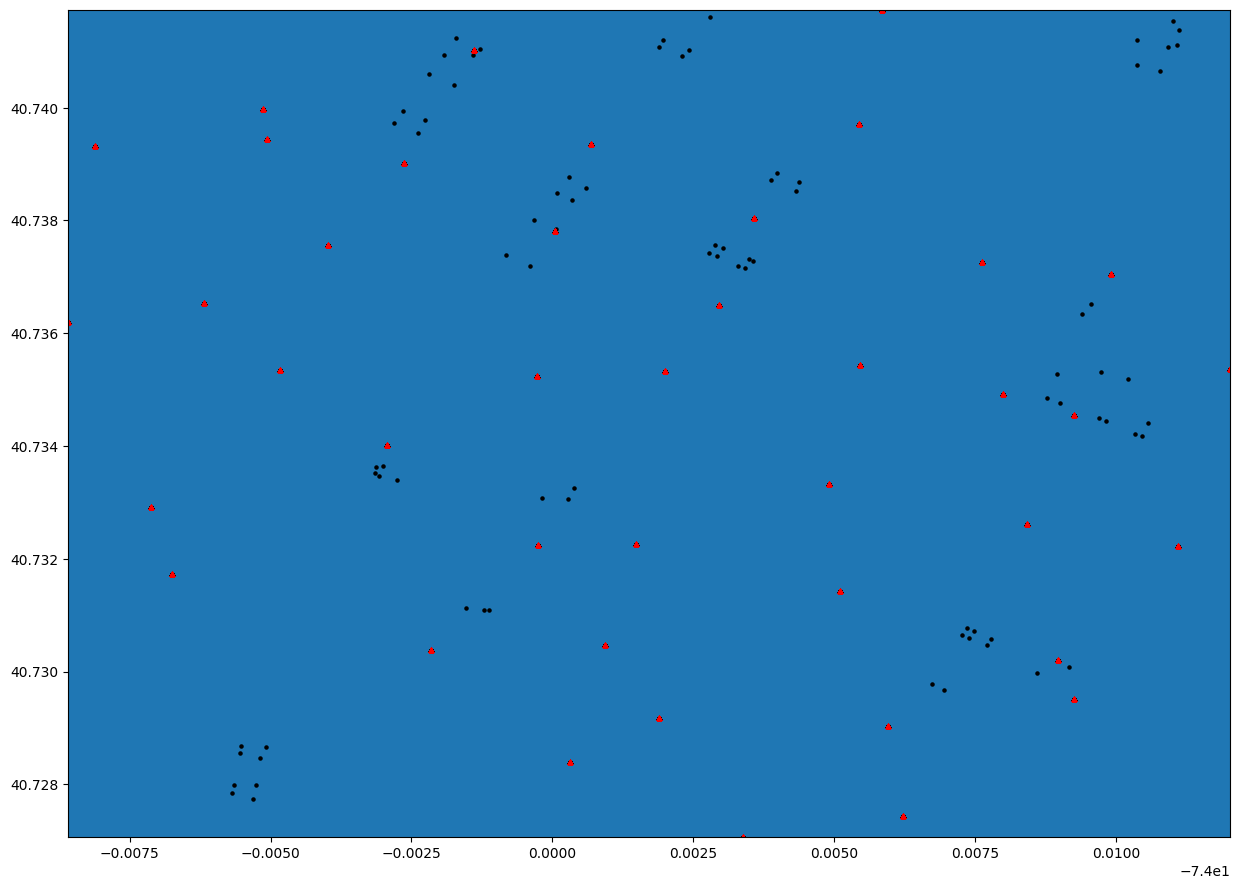

In [ ]:
newyork = 'bobo/geo_export_d99d1bf6-4805-4c39-9626-98befb32f3da.shp'
gdf = gpd.read_file(newyork)
min_lon, min_lat, max_lon, max_lat = min(cluster_1_pickups_op['start_station_longitude']), min(cluster_1_pickups_op['start_station_latitude']),max(cluster_1_pickups_op['start_station_longitude']), max(cluster_1_pickups_op['start_station_latitude'])
bbox = box(min_lon, min_lat, max_lon, max_lat)
gdf_filtered = gdf[gdf.geometry.intersects(bbox)]
ax=gdf_filtered.plot(figsize=(15,15))

geo_station.plot(ax=ax, marker='o', color='black', markersize=5)
geo_bikes_pickup.plot(ax=ax,marker='^', color='red', markersize=8)
plt.xlim((min(cluster_1_pickups_op['start_station_longitude']), max(cluster_1_pickups_op['start_station_longitude'])))
plt.ylim((min(cluster_1_pickups_op['start_station_latitude']), max(cluster_1_pickups_op['start_station_latitude'])))

In [ ]:
m=folium.Map(location=[40.70986392898603, -74.01127897004845], zoom_start=5)
heat_m =folium.Map(location=[40.70986392898603, -74.01127897004845], zoom_start=5)

In [ ]:
#heatmap for all year cluster 1
heat_m_pickups = cluster_1_pickups_op[['start_station_latitude','start_station_longitude']].to_numpy()
HeatMap(heat_m_pickups).add_to(heat_m)

for index, row in df_station.iterrows():
    if min_lon <= row['Entrance Longitude'] <= max_lon and min_lat <= row['Entrance Latitude'] <= max_lat:
        station_ID = str(row['Station Name'])
        folium.Marker(
            [row['Entrance Latitude'], row['Entrance Longitude']],
            popup=folium.Popup(station_ID, parse_html=True)
        ).add_to(heat_m)

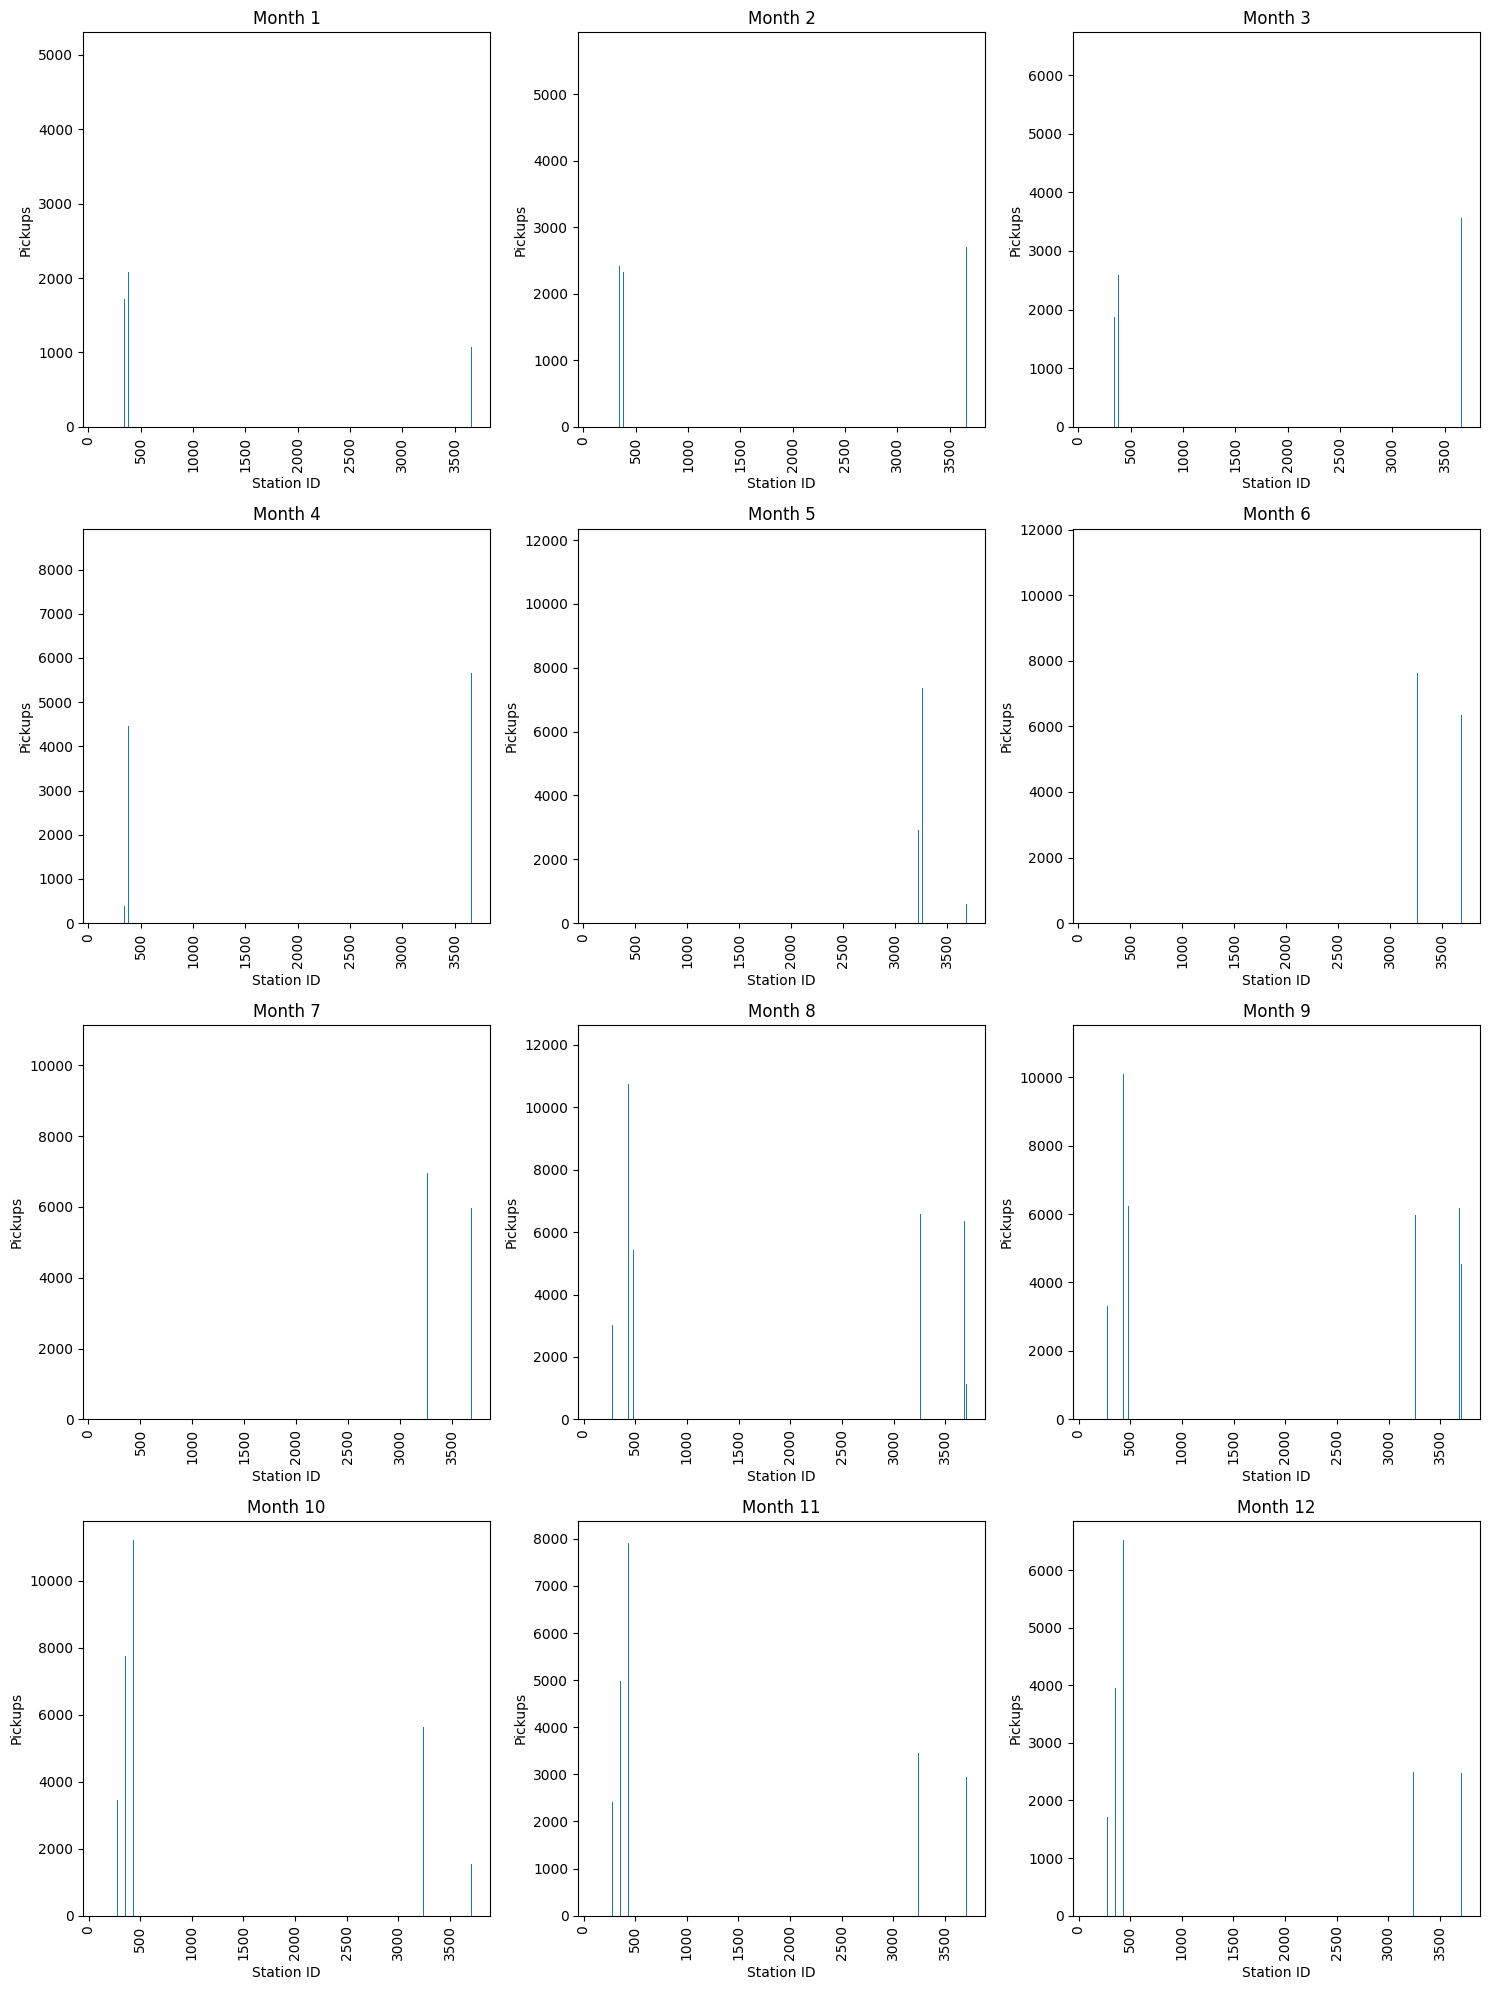

In [ ]:
num_months = len(pickup_count_per_station_month)
num_cols = 3 
num_rows = (num_months - 1) // num_cols + 1  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))  

for i, (month_to_plot, data_for_month) in enumerate(pickup_count_per_station_month.items()):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    ax.bar(data_for_month['start_station_id'], data_for_month['Pickups'])
    ax.set_xlabel('Station ID')
    ax.set_ylabel('Pickups')
    ax.set_title(f'Month {month_to_plot}')
    ax.tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()

In [ ]:
grouped = cluster_1_pickups_op.groupby(cluster_1_pickups_op['starttime'].dt.month)
pickup_count_per_station_month = {
    month: grouped.get_group(month).groupby('start_station_id').size().reset_index(name='Pickups')
    for month in cluster_1_pickups_op['starttime'].dt.month.unique()
}

In [ ]:
def tripcount(month_number):
    trip_count = pd.merge(cluster_1_pickups_IDs, pickup_count_per_station_month[month_number] , on='start_station_id', how='inner')  # Merging on the common column
    return trip_count

In [ ]:
#change variable in cluster_1_pickups_op_monthly[x] here to view for each month 
def make_map(month, month_number):
    oye = cluster_1_pickups_op_monthly[month_number]
    heat_m_pickups = oye[['start_station_latitude','start_station_longitude']].to_numpy()  #MAKING THE HEATMAP FOR EACH MONTH USING NUMPY
    HeatMap(heat_m_pickups).add_to(heat_m)  #ADDING IT TO THE HEATMAP 

    marker_df = tripcount(month_number=month_number)

    for index, row in marker_df.iterrows(): #ADDING THE MARKERS ON THE MAP 
        station_ID = int(row['start_station_id']) 
        pickups = int(row['Pickups'])
        disp = f"Station ID: {station_ID} <br> Pickups: {pickups}"
        #print(disp)
        folium.Marker([row['start_station_latitude'], row['start_station_longitude']],
                    popup=folium.Popup(disp,parse_html=False), icon=folium.Icon(color='red')).add_to(heat_m)

    min_lon, min_lat, max_lon, max_lat = min(cluster_1_pickups_op['start_station_longitude']), min(cluster_1_pickups_op['start_station_latitude']),max(cluster_1_pickups_op['start_station_longitude']), max(cluster_1_pickups_op['start_station_latitude'])

    for index, row in df_station.iterrows():
        if min_lon <= row['Station Latitude'] <= max_lon and min_lat <= row['Station Longitude'] <= max_lat:
            station_ID = str(row['Station Name'])
            folium.Marker(
                [row['Station Latitude'], row['Station Longitude']],
                popup=folium.Popup(station_ID, parse_html=True), 
                icon=folium.Icon(color='blue')
            ).add_to(heat_m)
    filename = f"{month}.html"
    heat_m.save(filename)

#change entrance GPS to station GPS

# PART 4 Conclusion 


**Summary of Key Findings and Insights**  
 
<ins>Summary of main findings from the Prediction Challenge:</ins>  
 
Spatial clustering of bike stations offers benefits like efficient data organization and high-demand detection but suffers from limitations like fixed clusters and ignoring station interactions. Its effectiveness in demand prediction depends on the correlation with actual demand, needing dynamic models and additional data for better forecasts.  
K-Means clustering effectively grouped stations, aiding in demand prediction. Predictive models achieved good R2 ratings above 0.79, indicating strong data fits, though they had higher mean squared errors (MSEs) compared to benchmark linear regression, suggesting room for accuracy improvement. Despite good data fit, linear regression outperformed in accuracy, especially in reducing errors. The high R2 value suggests the method can ensure sufficient bike availability, but may lead to excess due to not considering previous days' bike counts, highlighting the need for historical data integration.  
 
<ins>Summary of the insights derived from the Exploratory Component:</ins>  
 
Using time series analysis it can be seen that seasonality and weather conditions plays a significant role in the total number of trips per day and this can be forecasted using the SARIMA model.  
Using the nearby metro station and plotting the heatmap for bike usage in that cluster it can be seen that bike stations far away from the train stations show a higher pickup / dropoff concentration, very contrary to the original assumption.  
 
**Reflection on Methodologies and Techniques**
 
In our analysis, various regression techniques yielded similar results, but the Multi-layer perceptron neural network was the most effective based on R2 scores. We aggregated data for hourly counts, requiring the exclusion of non-aggregated features and the creation of lag and time-based features. This approach seemed necessary for predicting a single day based on the previous day's data. The dataset contained irrelevant entries, like trips far from New York City or over 24 hours long, and many undefined values, which we removed. Predicting daily demand on an hourly basis from limited prior day data proved challenging due to the variability in pickups and dropoffs, which often didn't correlate with the previous day.  
 
**Implications and Practical Applications**  
 
The insights gained from all the different models can be used to better explain how the bike-sharing data over time as well as being used for future predictions. They are particularly valuable for forecasting the demand of the service and optimising the allocation of resources.

Contribution <br>
Introduction: Natsuki Sato<br>
Prediction Clustering: Ashish Kukreti<br>
Prediction Neural Network: Daniel Lihotsky<br>
Exploratory Weather: Oskar Fusager<br>
Exploratory Metro Stations: Ashutosh Dhaka <br>
